<a href="https://colab.research.google.com/github/Sushma-Niveni/Breast-Cancer-Classifier/blob/main/DataScientistAssesment_PSN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Telco Churn Analysis

**Dataset Info:**
Sample Data Set containing Telco customer data and showing customers left last month

In [307]:
#import the required libraries
import numpy as np
import pandas as pd

# Seaborn for statistical data visualization
import seaborn as sns

# matplotlib.ticker to customize tick marks on plots
import matplotlib.ticker as mtick

# pyplot from matplotlib for creating static plots
import matplotlib.pyplot as plt

# This line is for displaying plots inline within a Jupyter notebook
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

**Load the data file **

In [308]:
telco_base_data = pd.read_csv(r'/content/Telconnect data.csv')

Look at the top 5 records of data

In [309]:
#Look at the top 5 records of data; to ensure that we loaded the data properly or not
telco_base_data.head()

,customerID,gender,SeniorCitizen,Has_Partner,Has_Dependents,account_tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Check the various attributes of data like shape (rows and cols), Columns, datatypes

In [310]:
# To see how many rows and columns it contains
telco_base_data.shape


(7043, 21)

In [311]:
# Listing the column names of the 'telco_data' DataFrame
telco_base_data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Has_Partner',
       'Has_Dependents', 'account_tenure', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'], dtype=object)

In [312]:
# Checking the data types of all the columns
telco_base_data.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Has_Partner,object
Has_Dependents,object
account_tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [313]:
# Check the descriptive statistics of numeric variables
telco_base_data.describe()

,SeniorCitizen,account_tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


1. **SeniorCitizen**: A binary categorical feature (0 = non-senior, 1 = senior), making percentiles less relevant—focus on counts or proportions instead.

2. **Tenure**: Average tenure is 32.37 months, with 75% of customers having been with the service for less than 55 months, ranging from 0 to 72 months.

3. **MonthlyCharges**: Average monthly charge is USD 64.76, with 25% of customers paying more than USD 89.85, indicating a mix of lower and higher charge tiers.

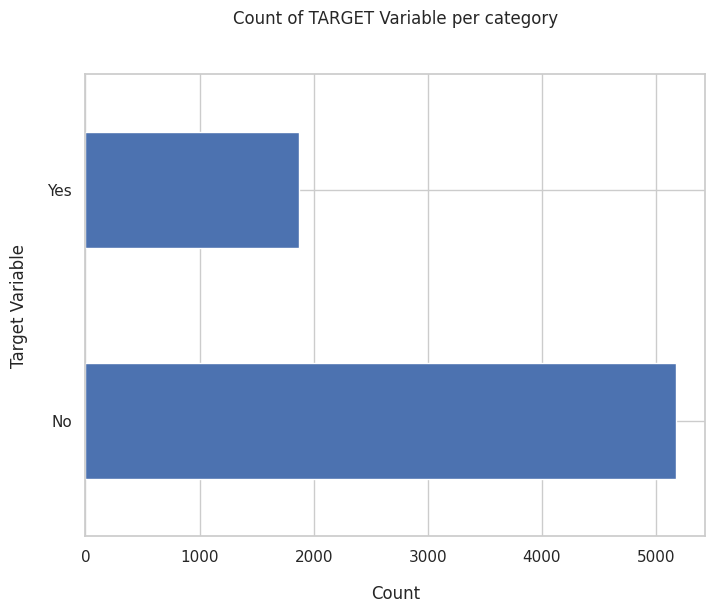

In [314]:
telco_base_data['Churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

In [315]:
100*telco_base_data['Churn'].value_counts()/len(telco_base_data['Churn'])

,count
Churn,
No,73.463013
Yes,26.536987


In [316]:
telco_base_data['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


* Data is highly imbalanced, ratio = 73:27<br>
* So we analyse the data with other features while taking the target values separately to get some insights.

In [317]:
# Concise Summary of the dataframe, as we have too many columns, we are using the verbose = True mode
telco_base_data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Has_Partner       7043 non-null   object 
 4   Has_Dependents    7043 non-null   object 
 5   account_tenure    7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


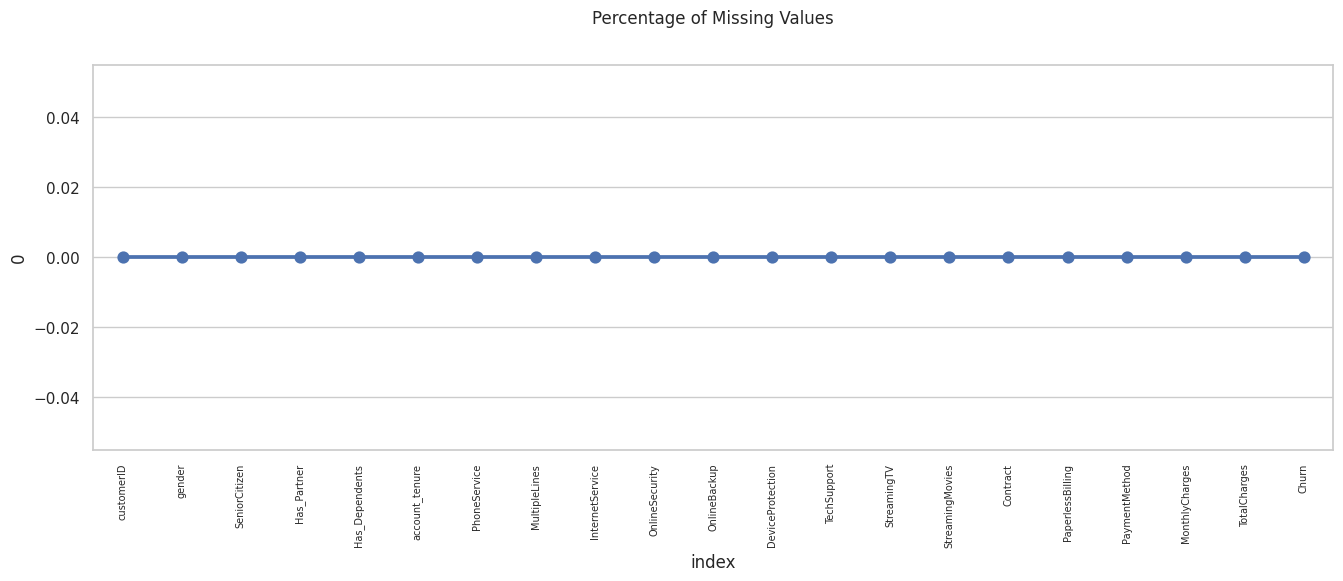

In [318]:
missing = pd.DataFrame((telco_base_data.isnull().sum())*100/telco_base_data.shape[0]).reset_index()
plt.figure(figsize=(16,5))

# 'x' for the feature name, 'y' for the missing percentage
ax = sns.pointplot(x='index', y=0, data=missing)

plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing Values")
plt.show()

### Missing Data - Initial Intuition

* Here, we don't have any missing data.

General Thumb Rules:

* For features with less missing values- can use regression to predict the missing values or fill with the mean of the values present, depending on the feature.
* For features with very high number of missing values- it is better to drop those columns as they give very less insight on analysis.
* As there's no thumb rule on what criteria do we delete the columns with high number of missing values, but generally you can delete the columns, if you have more than 30-40% of missing values. But again there's a catch here, for example, Is_Car & Car_Type, People having no cars, will obviously have Car_Type as NaN (null), but that doesn't make this column useless, so decisions has to be taken wisely.

## Data Cleaning


**1.** Create a copy of base data for manipulation & processing

In [1]:
telco_data = telco_base_data.copy()

NameError: name 'telco_base_data' is not defined

**2.** Total Charges should be numeric amount. Let's convert it to numerical data type

In [2]:
telco_data.TotalCharges = pd.to_numeric(telco_data.TotalCharges, errors='coerce')
telco_data.isnull().sum()

NameError: name 'pd' is not defined

**3.** As we can see there are 11 missing values in TotalCharges column. Let's check these records

In [ ]:
telco_data.loc[telco_data ['TotalCharges'].isnull() == True]

**4. Missing Value Treatment**

Since the % of these records compared to total dataset is very low ie 0.15%, it is safe to ignore them from further processing.

In [ ]:
#Removing missing values
telco_data.dropna(how = 'any', inplace = True)

telco_data.fillna(0)

**5.** Divide customers into bins based on tenure e.g. for tenure < 12 months: assign a tenure group if 1-12, for tenure between 1 to 2 Yrs, tenure group of 13-24; so on...

In [ ]:
# Get the max tenure
print(telco_data['account_tenure'].max()) #72

In [ ]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

telco_data['tenure_group'] = pd.cut(telco_data.account_tenure, range(1, 80, 12), right=False, labels=labels)

In [ ]:
telco_data['tenure_group'].value_counts()

**6.** Remove columns not required for processing

In [ ]:
#drop column customerID and tenure
telco_data.drop(columns= ['customerID','account_tenure'], axis=1, inplace=True)
telco_data.head()

## Data Exploration
**1. ** Plot distibution of individual predictors by churn

# Univariate Analysis

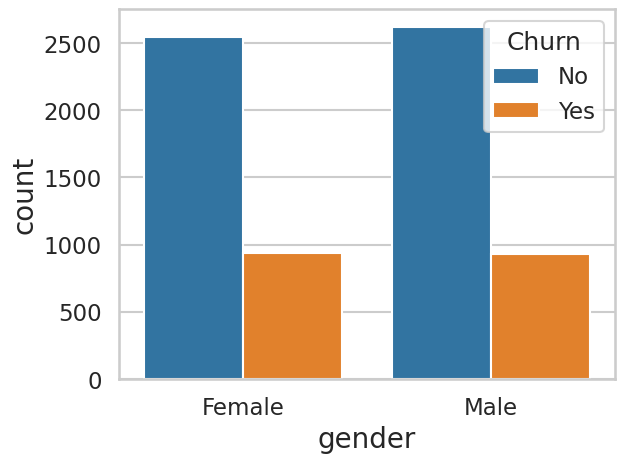

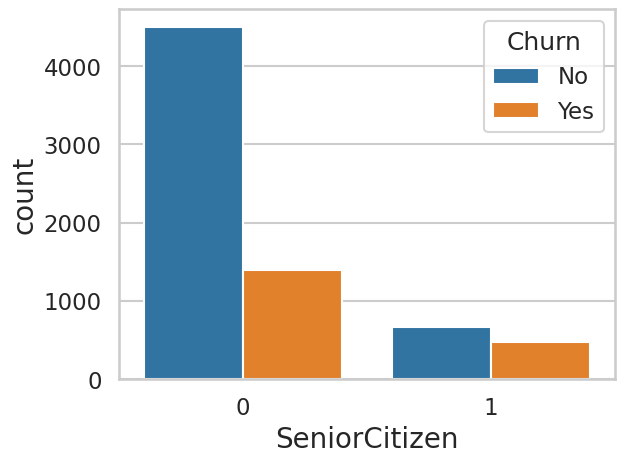

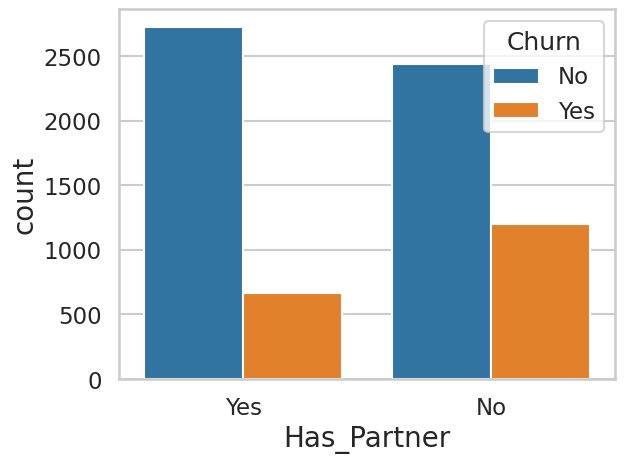

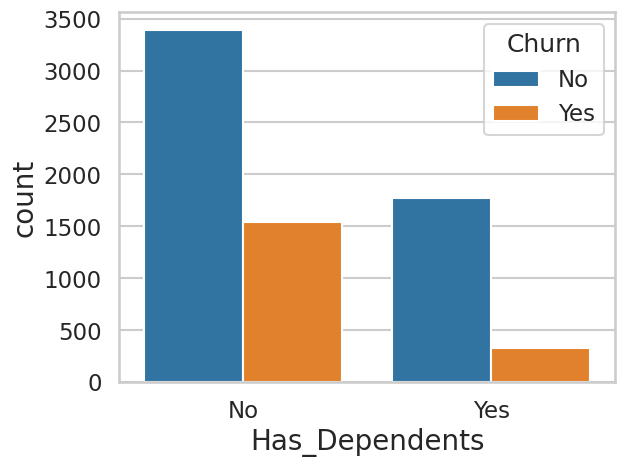

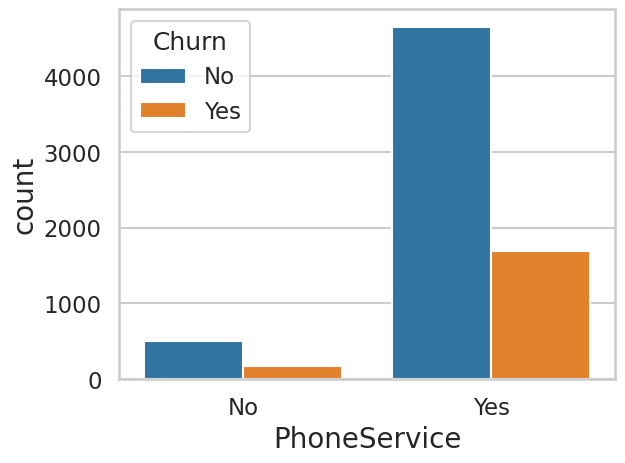

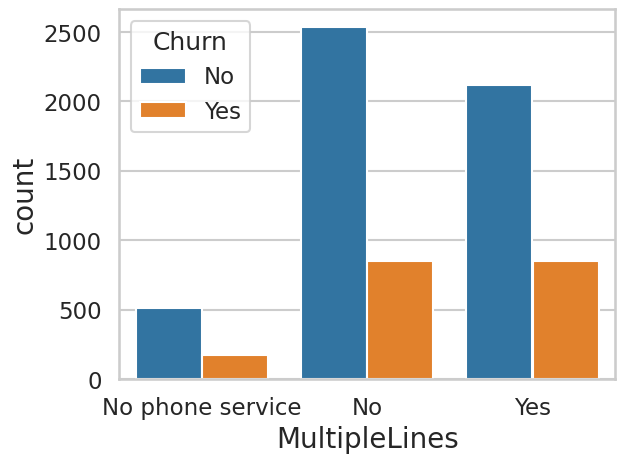

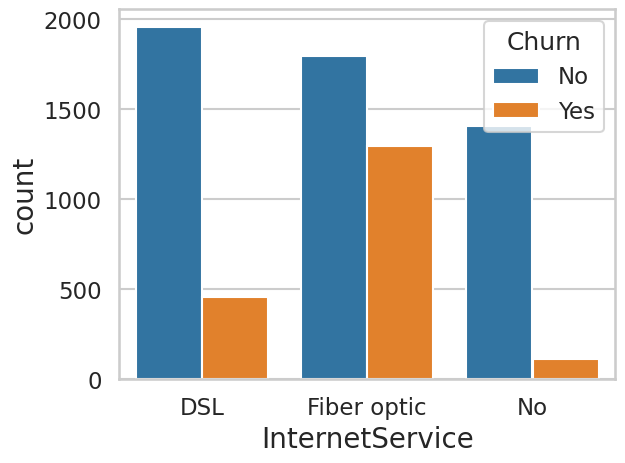

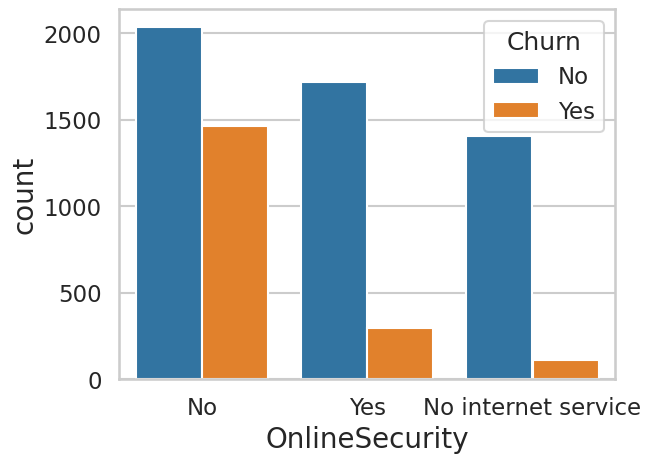

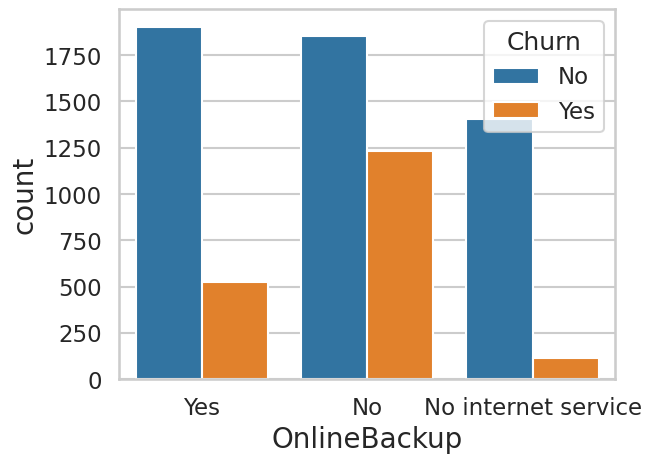

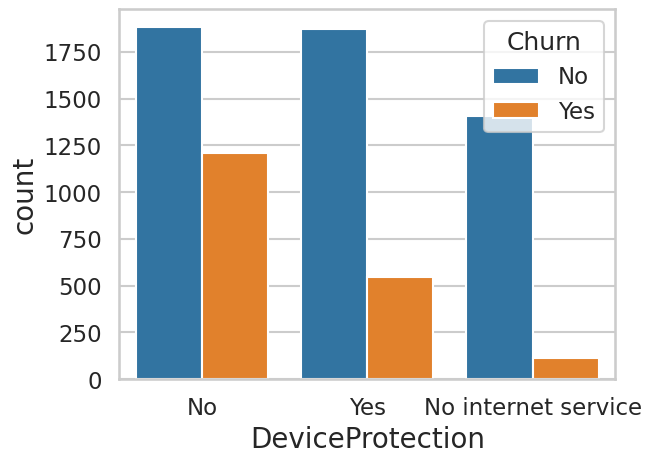

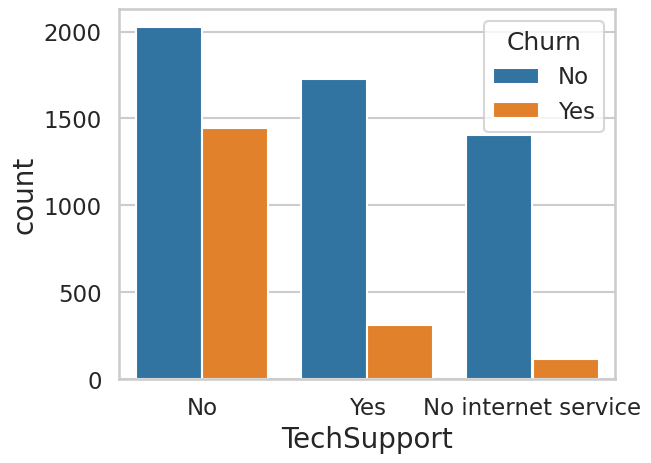

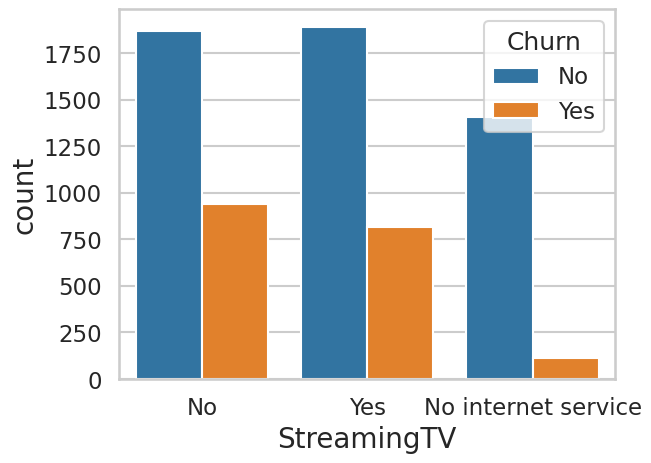

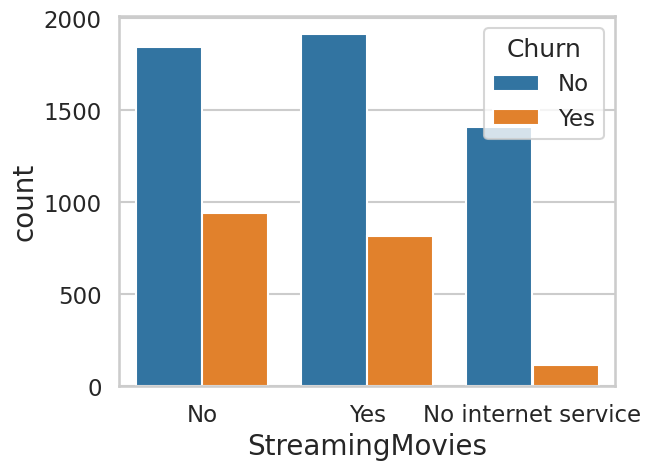

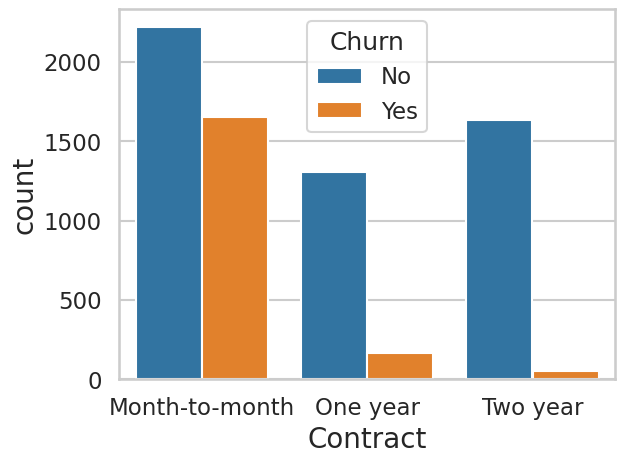

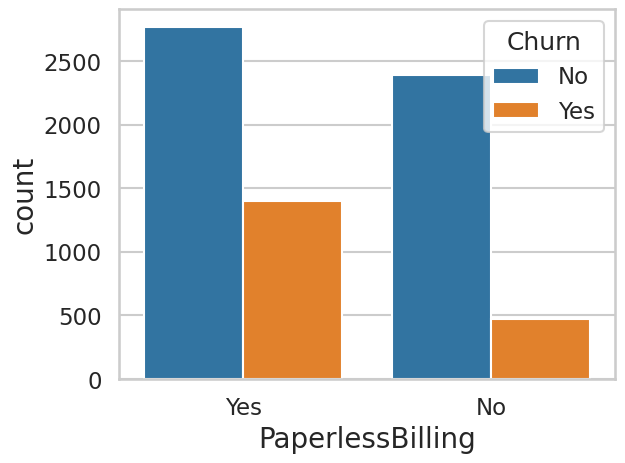

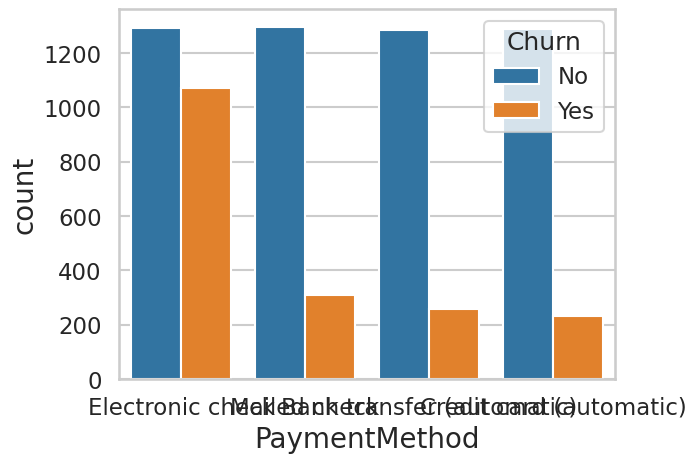

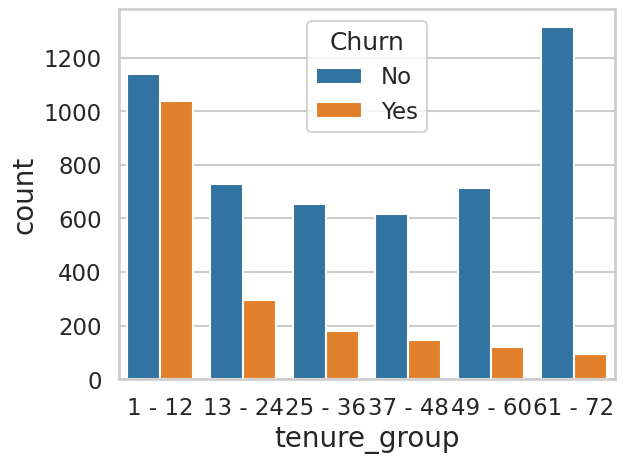

In [213]:
for i, predictor in enumerate(telco_data.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=telco_data, x=predictor, hue='Churn')

**2.** Convert the target variable 'Churn'  in a binary numeric variable i.e. Yes=1 ; No = 0

In [214]:
telco_data['Churn'] = np.where(telco_data.Churn == 'Yes',1,0)

In [215]:
telco_data.head()

,gender,SeniorCitizen,Has_Partner,Has_Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


**3.** Convert all the categorical variables into dummy variables

In [216]:
telco_data_dummies = pd.get_dummies(telco_data)
telco_data_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Has_Partner_No,Has_Partner_Yes,Has_Dependents_No,Has_Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,True,False,False,True,True,False,...,False,False,True,False,True,False,False,False,False,False
1,0,56.95,1889.50,0,False,True,True,False,True,False,...,False,False,False,True,False,False,True,False,False,False
2,0,53.85,108.15,1,False,True,True,False,True,False,...,False,False,False,True,True,False,False,False,False,False
3,0,42.30,1840.75,0,False,True,True,False,True,False,...,True,False,False,False,False,False,False,True,False,False
4,0,70.70,151.65,1,True,False,True,False,True,False,...,False,False,True,False,True,False,False,False,False,False


 Relationship between Monthly Charges and Total Charges

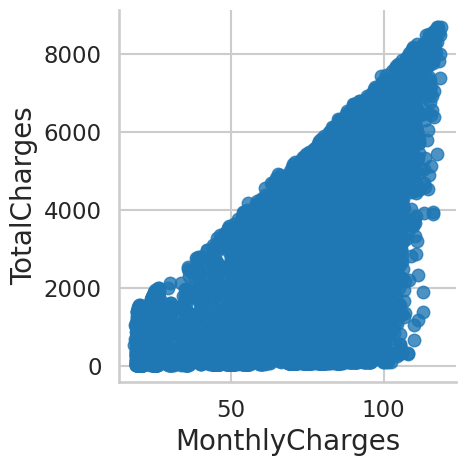

In [217]:
sns.lmplot(data=telco_data_dummies, x='MonthlyCharges', y='TotalCharges', fit_reg=False)

Total Charges increase as Monthly Charges increase - as expected.

 Churn by Monthly Charges and Total Charges

Text(0.5, 1.0, 'Monthly charges by churn')

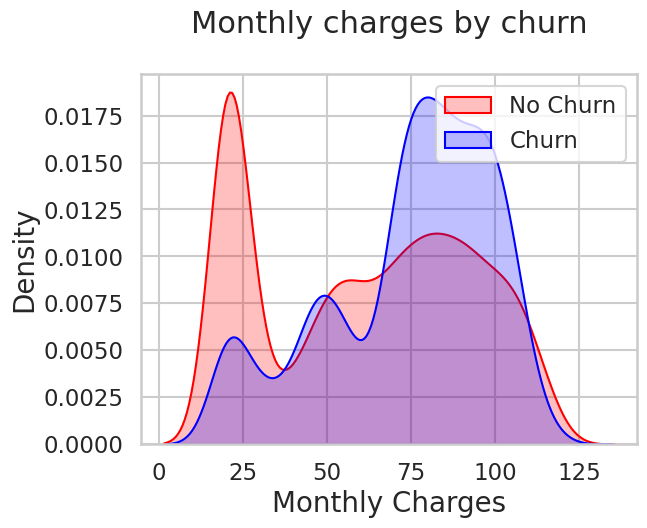

In [218]:
Mth = sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies["Churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies["Churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

**Insight:** Churn is high when Monthly Charges ar high

Text(0.5, 1.0, 'Total charges by churn')

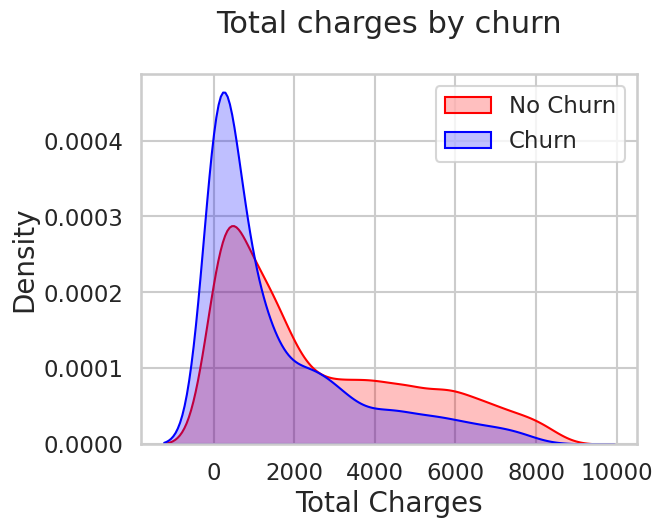

In [219]:
Tot = sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies["Churn"] == 0) ],
                color="Red", shade = True)
Tot = sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies["Churn"] == 1) ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')

**Surprising insight ** as higher Churn at lower Total Charges

However if we combine the insights of 3 parameters i.e. Tenure, Monthly Charges & Total Charges then the picture is bit clear :- Higher Monthly Charge at lower tenure results into lower Total Charge. Hence, all these 3 factors viz **Higher Monthly Charge**,  **Lower tenure** and **Lower Total Charge** are linkd to **High Churn**.

 Build a corelation of all predictors with 'Churn' **

<Axes: >

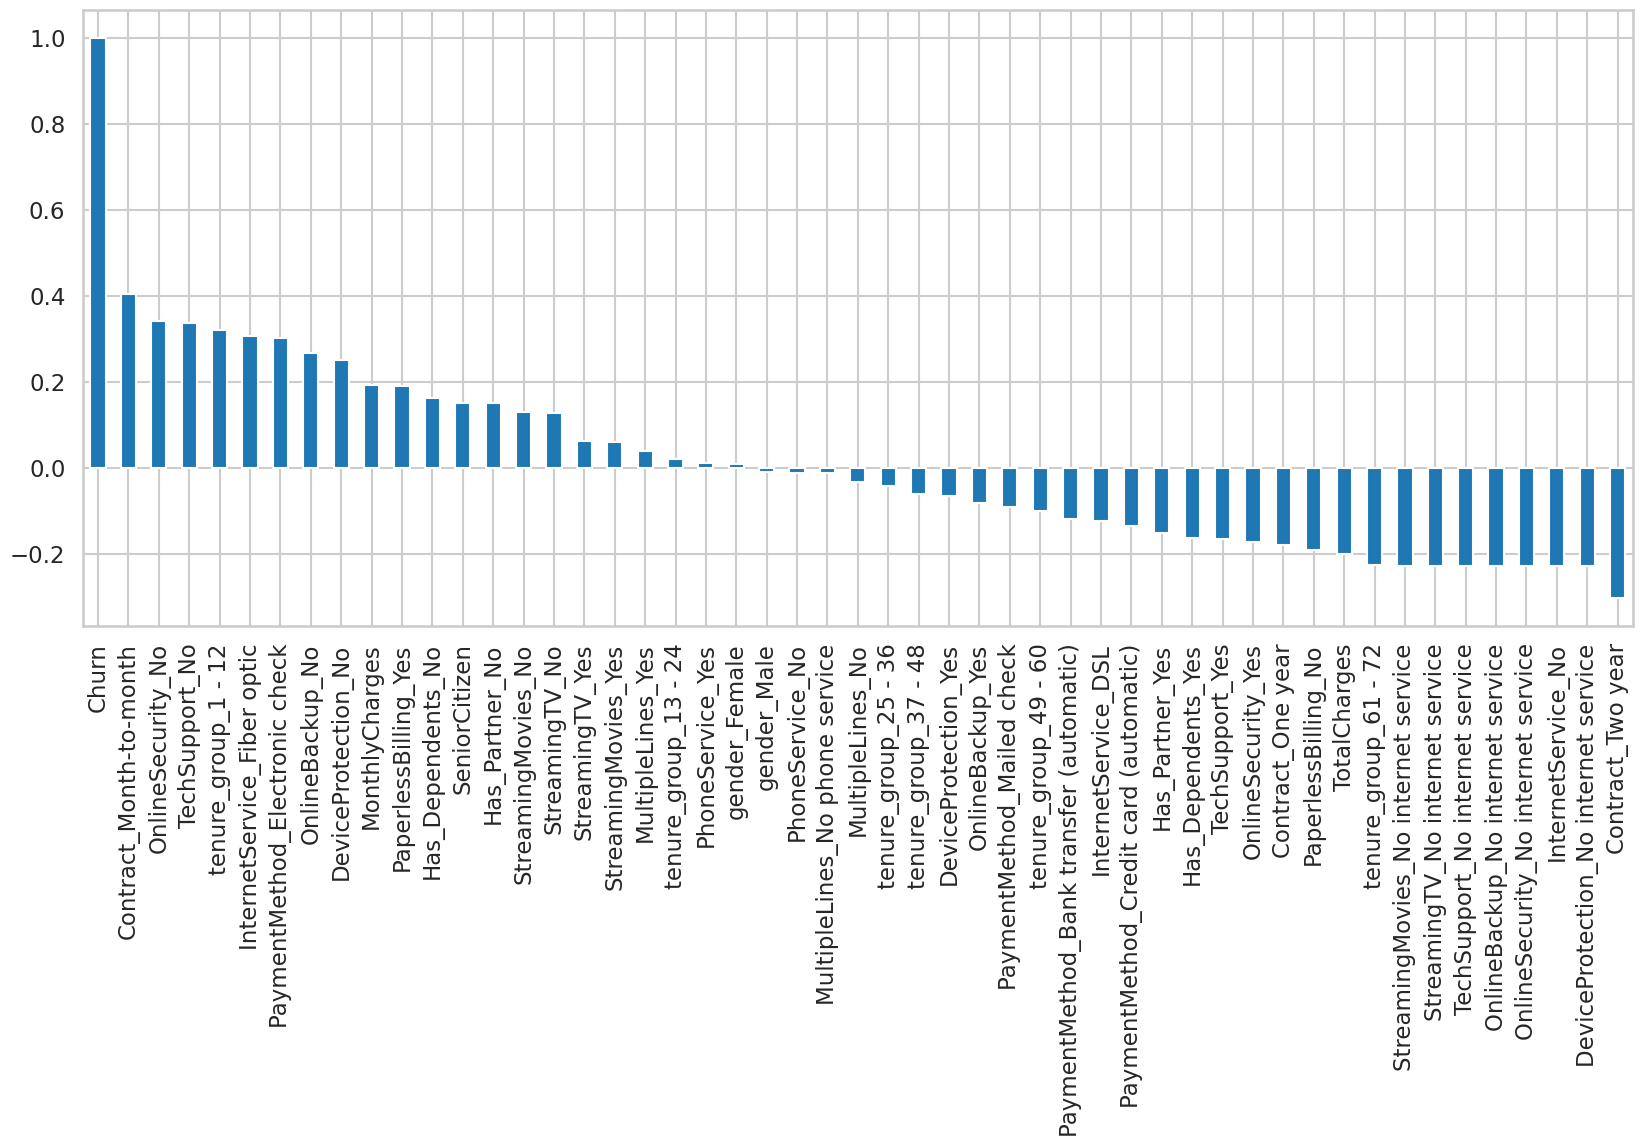

In [220]:
plt.figure(figsize=(20,8))
telco_data_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

**Derived Insight: **

**HIGH** Churn seen in case of  **Month to month contracts**, **No online security**, **No Tech support**, **First year of subscription** and **Fibre Optics Internet**

**LOW** Churn is seens in case of **Long term contracts**, **Subscriptions without internet service** and **The customers engaged for 5+ years**

Factors like **Gender**, **Availability of PhoneService** and **# of multiple lines** have alomost **NO** impact on Churn

This is also evident from the **Heatmap** below

<Axes: >

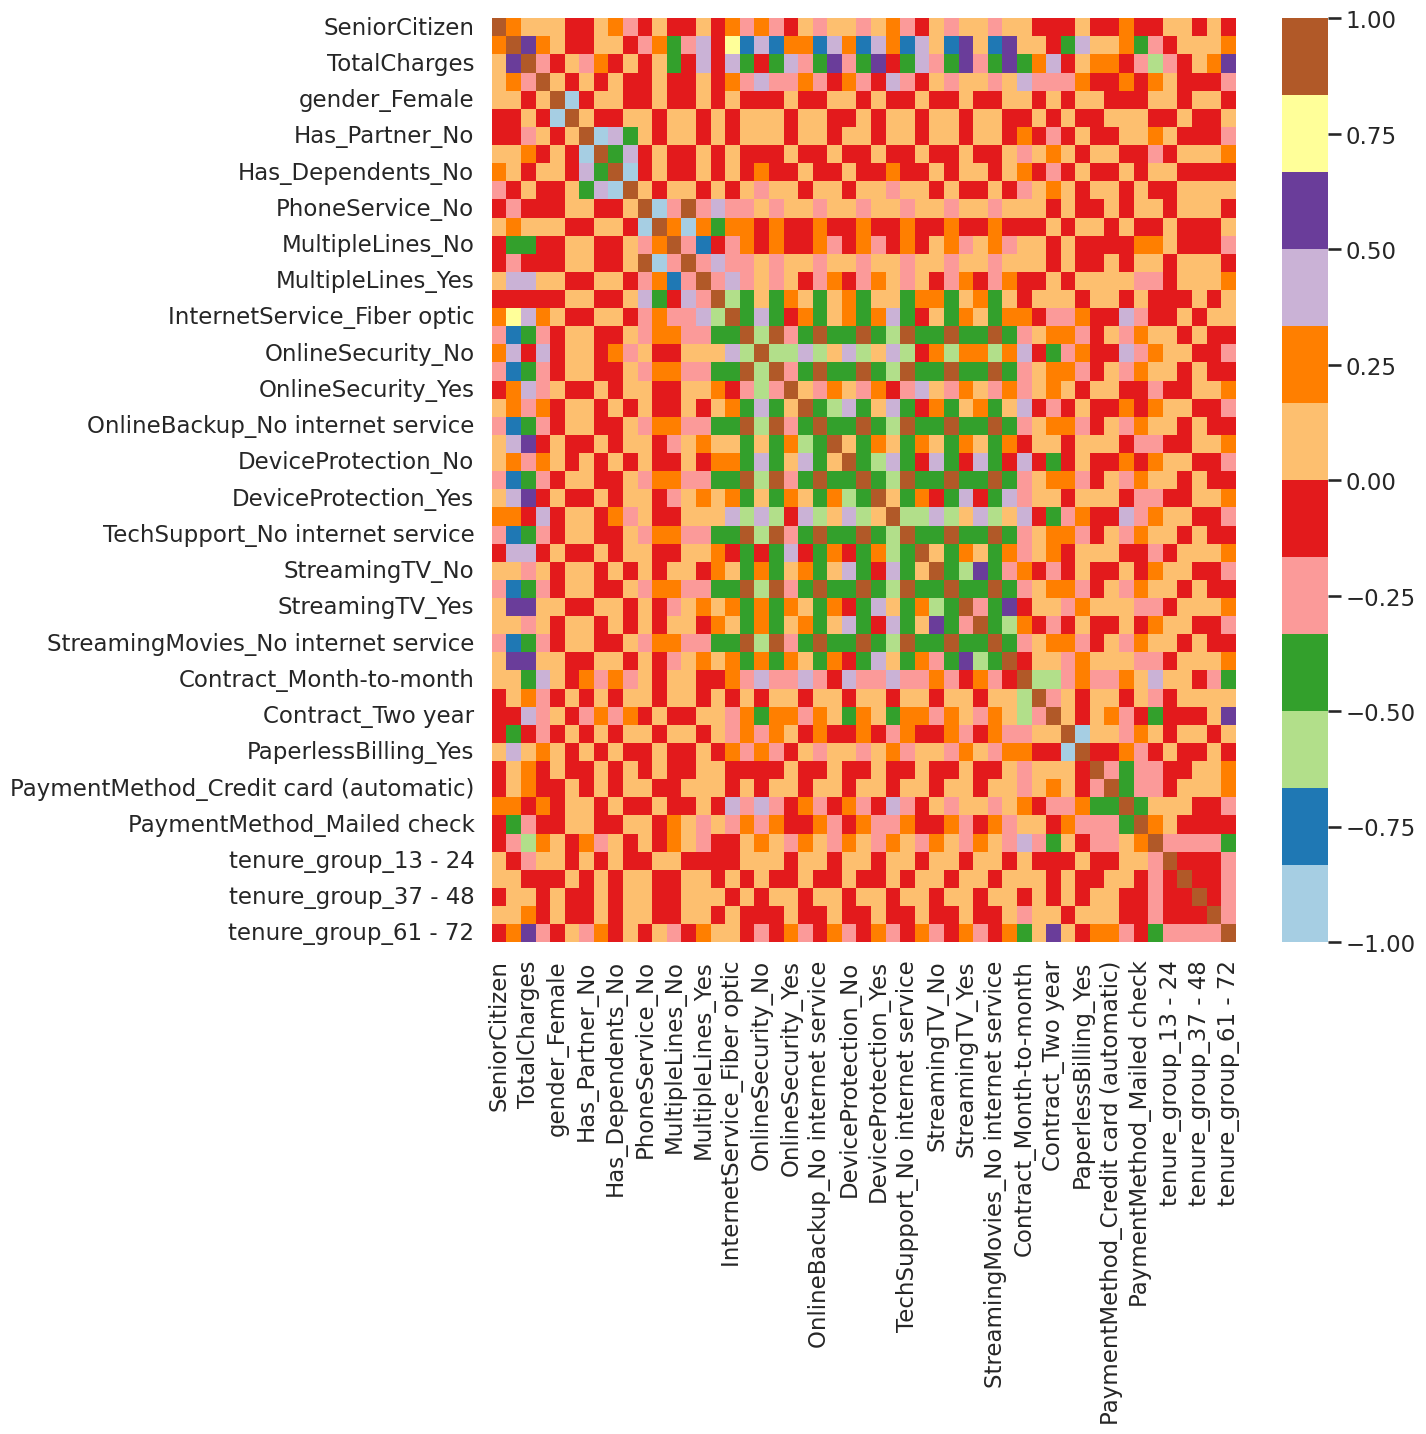

In [221]:
plt.figure(figsize=(12,12))
sns.heatmap(telco_data_dummies.corr(), cmap="Paired")

# Bivariate Analysis

In [222]:
new_df1_target0=telco_data.loc[telco_data["Churn"]==0]
new_df1_target1=telco_data.loc[telco_data["Churn"]==1]

In [223]:
def uniplot(df,col,title,hue =None):

    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30


    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright')

    plt.show()

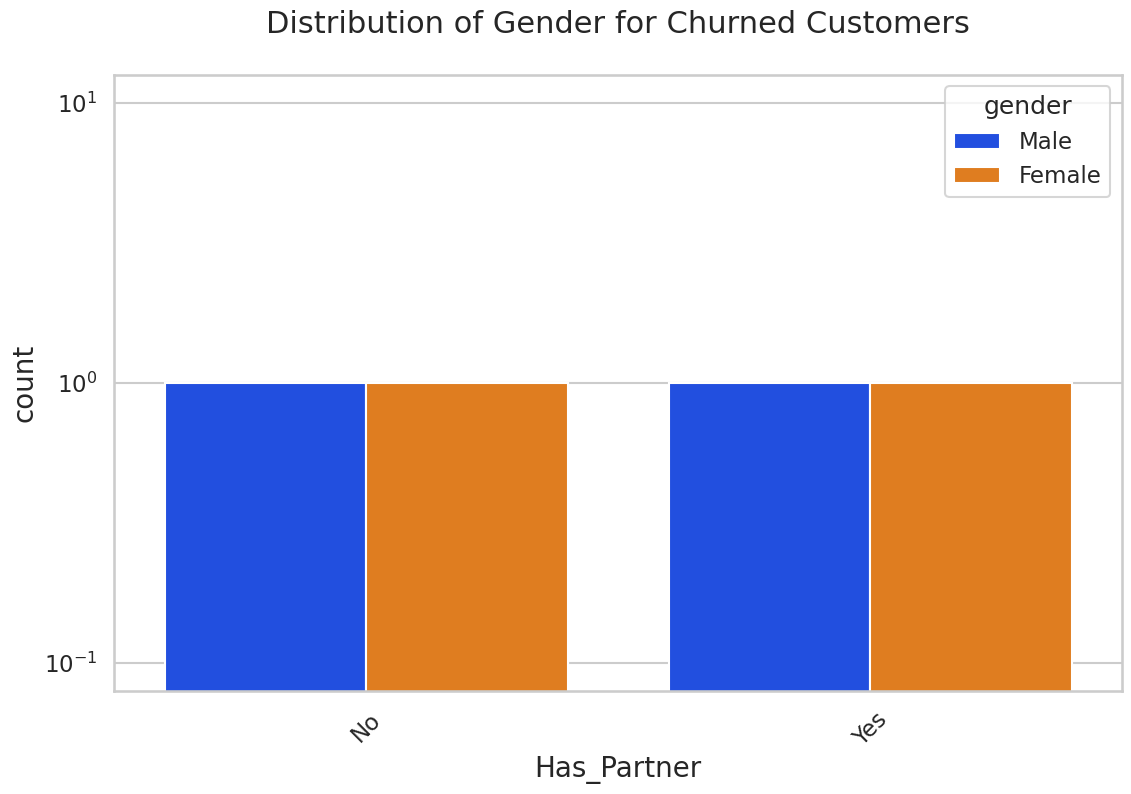

In [224]:
uniplot(new_df1_target1,col='Has_Partner',title='Distribution of Gender for Churned Customers',hue='gender')

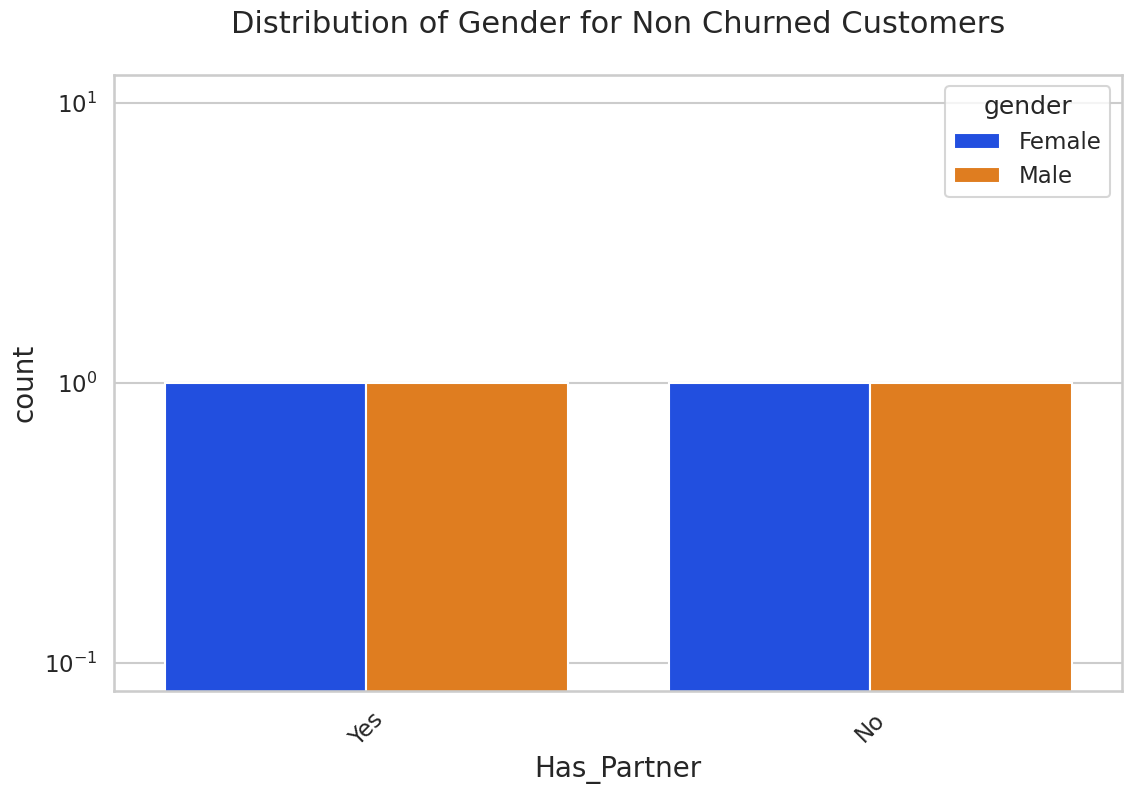

In [225]:
uniplot(new_df1_target0,col='Has_Partner',title='Distribution of Gender for Non Churned Customers',hue='gender')

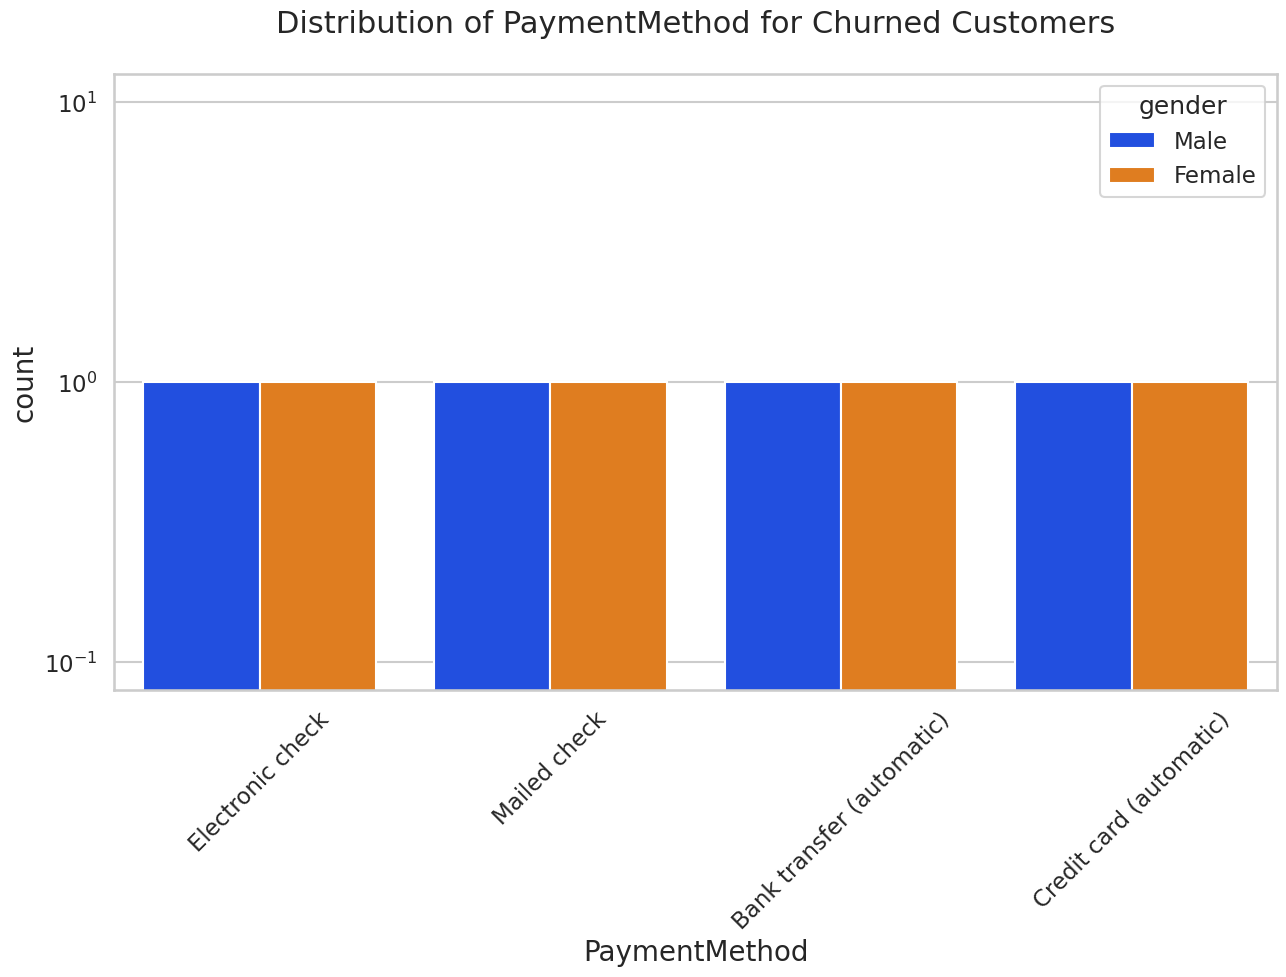

In [226]:
uniplot(new_df1_target1,col='PaymentMethod',title='Distribution of PaymentMethod for Churned Customers',hue='gender')

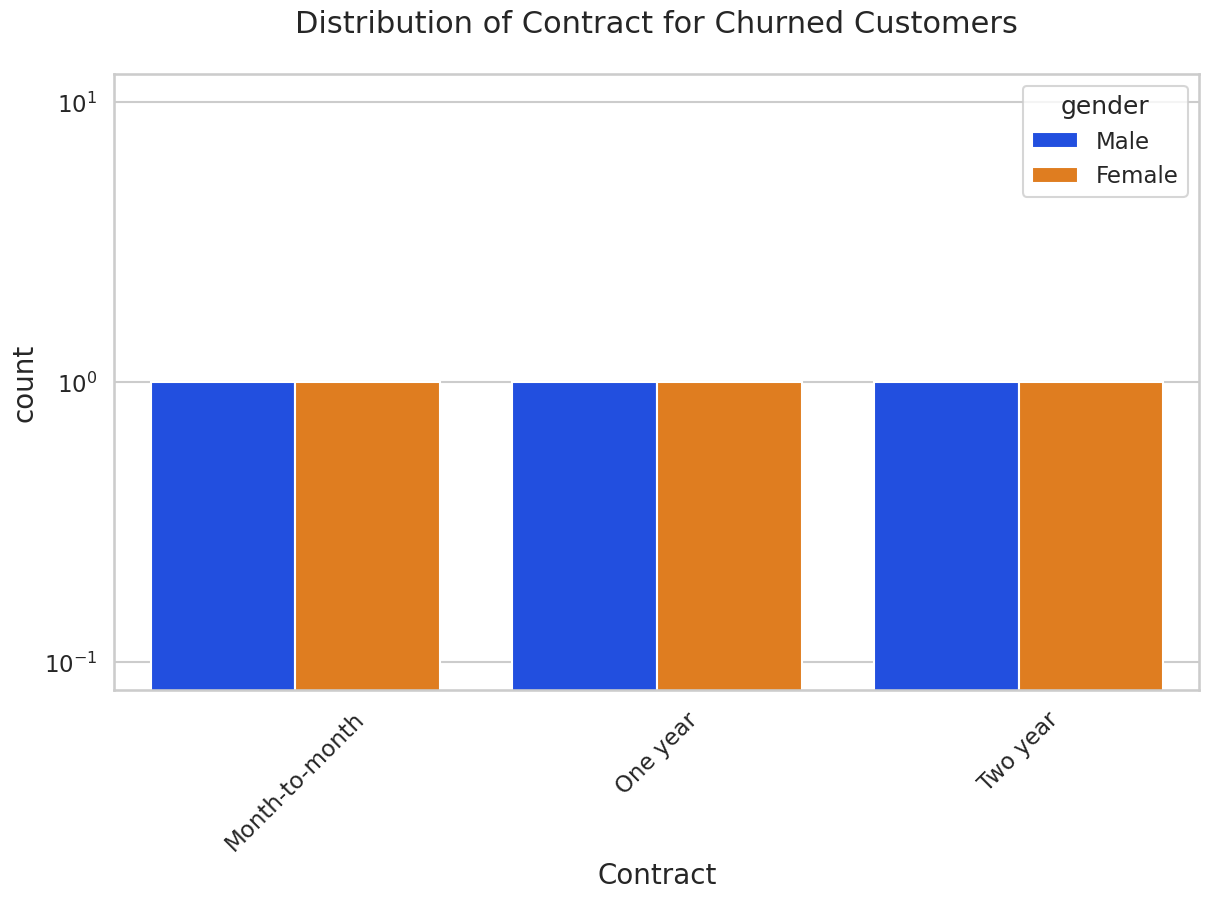

In [227]:
uniplot(new_df1_target1,col='Contract',title='Distribution of Contract for Churned Customers',hue='gender')

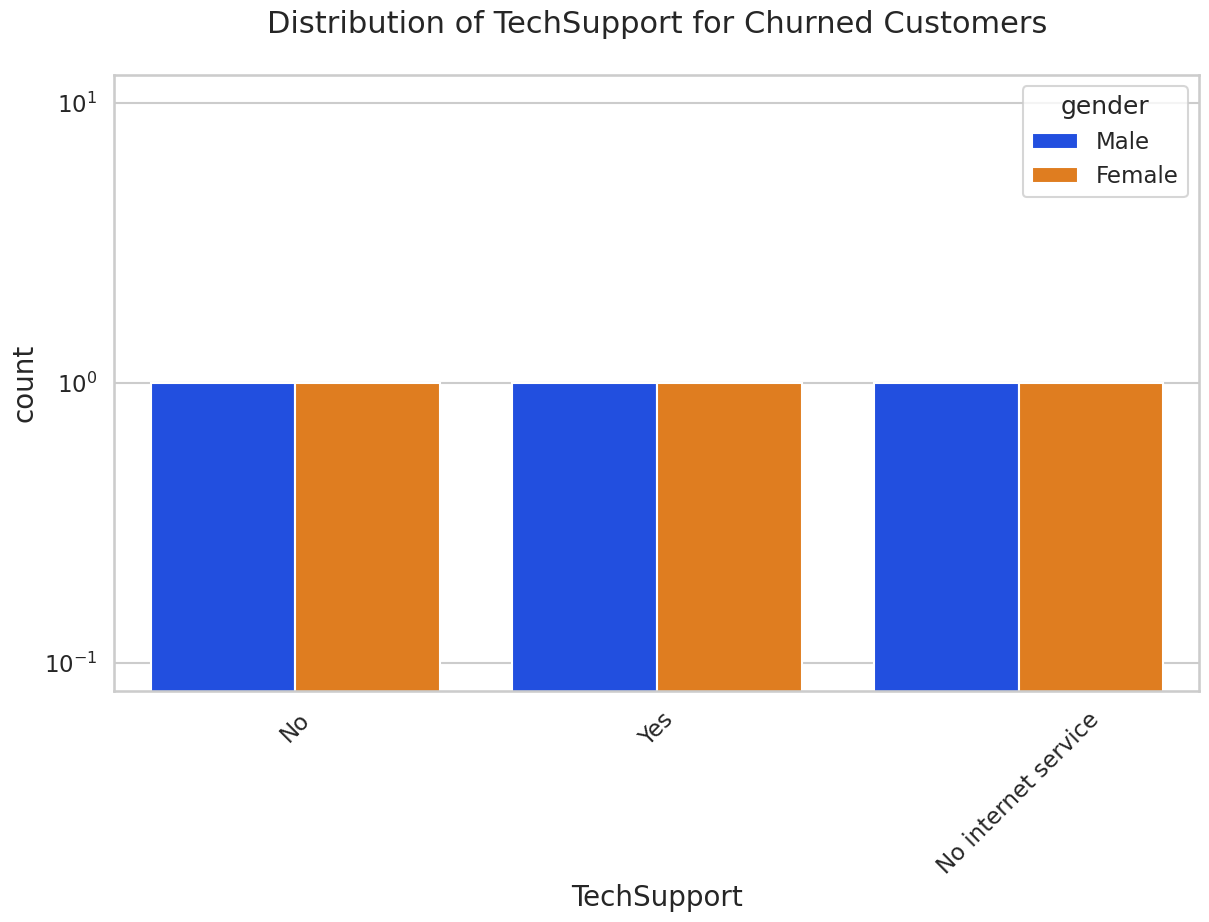

In [228]:
uniplot(new_df1_target1,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')

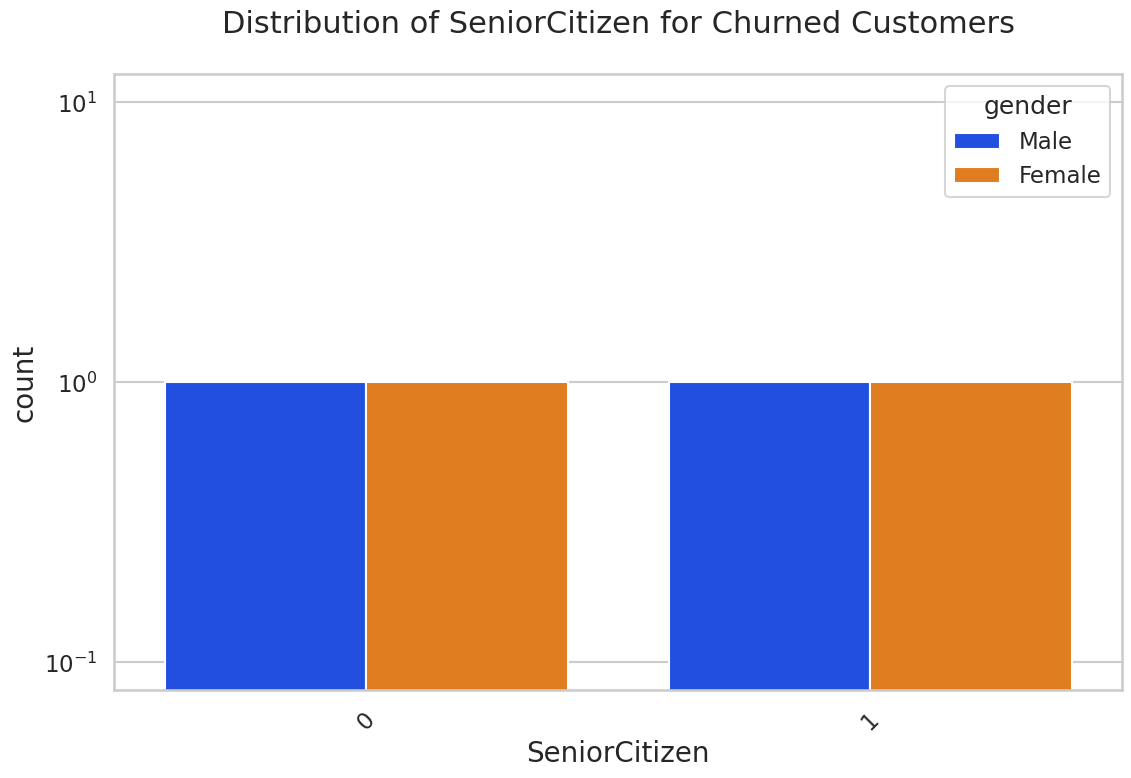

In [229]:
uniplot(new_df1_target1,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')

# CONCLUSION to EDA



1. **Gender & Age:**
   - **Male customers** have higher churn rates.
   - **SeniorCitizens** have lower churn rates.

2. **Household Status:**
   - **No partner** or **no dependents** increases churn likelihood.

3. **Service Features:**
   - **Phone service** and **multiple lines** lower churn.
   - **Fiber optic internet** users churn more than **DSL users**.
   - Absence of **online security**, **online backup**, or **tech support** correlates with higher churn.

4. **Contract Type:**
   - **Month-to-month contracts** have higher churn due to lack of commitment.
   - **One-year and two-year contracts** show lower churn.

5. **Billing Methods:**
   - **Paperless billing** customers are more likely to churn.

6. **Payment Methods:**
   - **Electronic checks** users have the highest churn risk.
   - **Mailed checks**, **bank transfers (automatic)**, and **credit cards (automatic)** are associated with lower churn.

### Retention Strategies:
- Target **customers without key services** (security, backup, support).
- Promote **long-term contracts** and **automatic payments**.
- Offer **bundled services** to customers with multiple lines or phone service.
- Address **male customers** and those without dependents with personalized retention efforts.



In [230]:
telco_data_dummies.to_csv('tel_churn.csv')

# Model Building

In [41]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve



In [42]:
df=pd.read_csv("tel_churn.csv")
df.head()

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Has_Partner_No,Has_Partner_Yes,Has_Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,0,29.85,29.85,0,True,False,False,True,True,...,False,False,True,False,True,False,False,False,False,False
1,1,0,56.95,1889.50,0,False,True,True,False,True,...,False,False,False,True,False,False,True,False,False,False
2,2,0,53.85,108.15,1,False,True,True,False,True,...,False,False,False,True,True,False,False,False,False,False
3,3,0,42.30,1840.75,0,False,True,True,False,True,...,True,False,False,False,False,False,False,True,False,False
4,4,0,70.70,151.65,1,True,False,True,False,True,...,False,False,True,False,True,False,False,False,False,False


In [43]:
df=df.drop('Unnamed: 0',axis=1)

In [44]:
x=df.drop('Churn',axis=1)
x


,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Has_Partner_No,Has_Partner_Yes,Has_Dependents_No,Has_Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,True,False,False,True,True,False,True,...,False,False,True,False,True,False,False,False,False,False
1,0,56.95,1889.50,False,True,True,False,True,False,False,...,False,False,False,True,False,False,True,False,False,False
2,0,53.85,108.15,False,True,True,False,True,False,False,...,False,False,False,True,True,False,False,False,False,False
3,0,42.30,1840.75,False,True,True,False,True,False,True,...,True,False,False,False,False,False,False,True,False,False
4,0,70.70,151.65,True,False,True,False,True,False,False,...,False,False,True,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,84.80,1990.50,False,True,False,True,False,True,False,...,False,False,False,True,False,True,False,False,False,False
7028,0,103.20,7362.90,True,False,False,True,False,True,False,...,False,True,False,False,False,False,False,False,False,True
7029,0,29.60,346.45,True,False,False,True,False,True,True,...,False,False,True,False,True,False,False,False,False,False
7030,1,74.40,306.60,False,True,False,True,True,False,False,...,False,False,False,True,True,False,False,False,False,False


In [45]:
y=df['Churn']
y

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7027,0
7028,0
7029,0
7030,1


##### Train Test Split

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# Logistic Regression

Accuracy is : 0.8123667377398721
Cross Validation Score :  83.88%
ROC_AUC Score :  72.08%
--------------------------------------------------------------------------------


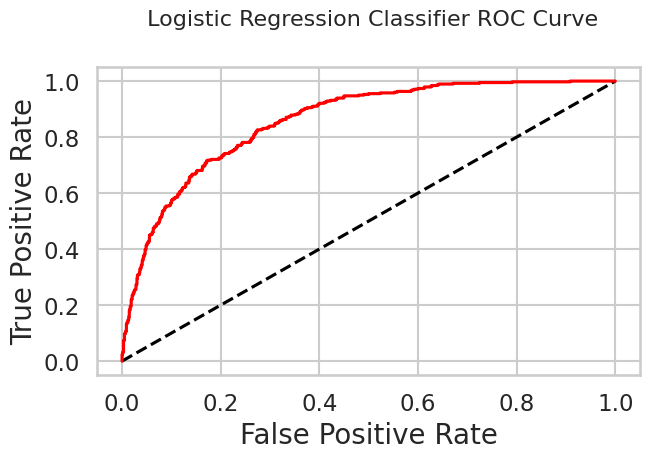

--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1028
           1       0.70      0.52      0.60       379

    accuracy                           0.81      1407
   macro avg       0.77      0.72      0.74      1407
weighted avg       0.80      0.81      0.80      1407



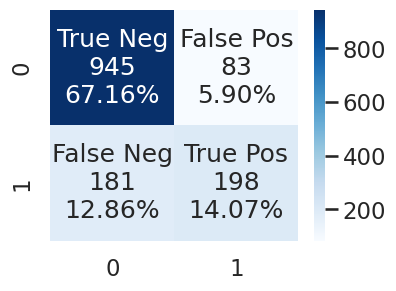

In [91]:
from sklearn.linear_model import LogisticRegression

classifier_lr = LogisticRegression(max_iter=200)

model(classifier_lr,x_train,y_train,x_test,y_test)

print('-'*80)

#plotting roc curve
y_pred_prob =classifier_lr.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(7, 4))

plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Logistic Regression Classifier',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' Logistic Regression Classifier ROC Curve',fontsize=16)
plt.show();

print('-'*80)

model_evaluation(classifier_lr,x_test,y_test)

# Decision Tree

Accuracy is : 0.7953091684434968
Cross Validation Score :  82.52%
ROC_AUC Score :  69.75%
--------------------------------------------------------------------------------


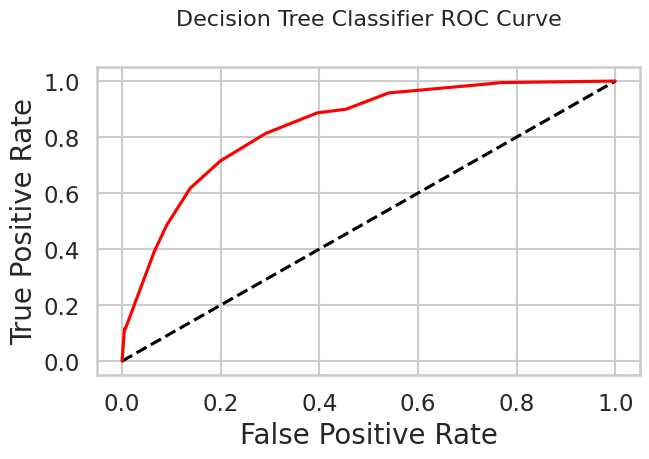

--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1028
           1       0.66      0.49      0.56       379

    accuracy                           0.80      1407
   macro avg       0.75      0.70      0.71      1407
weighted avg       0.78      0.80      0.78      1407



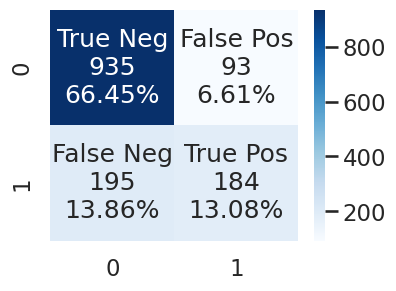

In [92]:
from sklearn.tree import DecisionTreeClassifier

classifier_dt = DecisionTreeClassifier(random_state = 1000,max_depth = 4,min_samples_leaf = 1)

model(classifier_dt,x_train,y_train,x_test,y_test)

print('-'*80)

#plotting roc curve
y_pred_prob =classifier_dt.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(7, 4))

plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Decision Tree Classifier',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree Classifier ROC Curve',fontsize=16)
plt.show();

print('-'*80)

model_evaluation(classifier_dt,x_test,y_test)

# RandomForest

Accuracy is : 0.7960199004975125
Cross Validation Score :  83.65%
ROC_AUC Score :  65.55%
--------------------------------------------------------------------------------


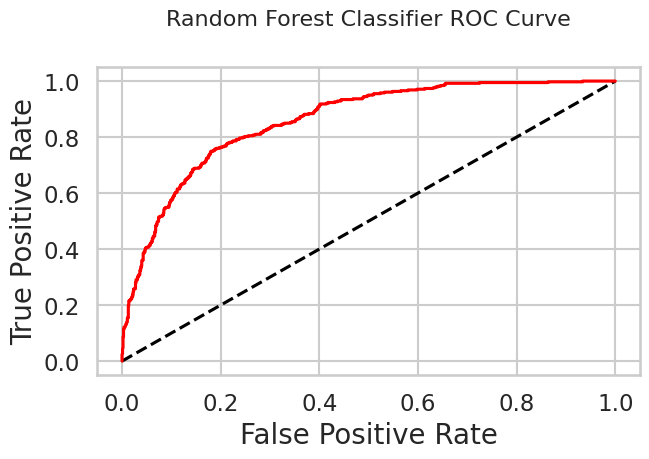

--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.96      0.87      1028
           1       0.76      0.35      0.48       379

    accuracy                           0.80      1407
   macro avg       0.78      0.66      0.68      1407
weighted avg       0.79      0.80      0.77      1407



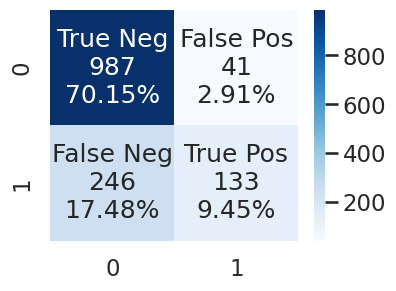

In [54]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(max_depth = 4,random_state = 0)

model(classifier_rf,x_train,y_train,x_test,y_test)

print('-'*80)

#plotting roc curve
y_pred_prob =classifier_rf.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(7, 4))

plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Random Forest Classifier',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier ROC Curve',fontsize=16)
plt.show();

print('-'*80)

model_evaluation(classifier_rf,x_test,y_test)

# RandomForest + Smoteen()

In [93]:
sm = SMOTEENN()
X_resampled1, y_resampled1 = sm.fit_resample(x, y)
xr_train1,xr_test1,yr_train1,yr_test1=train_test_split(X_resampled1, y_resampled1,test_size=0.2)
model_rf_smote=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)
model_rf_smote.fit(xr_train1,yr_train1)
yr_predict1 = model_rf_smote.predict(xr_test1)
model_score_r1 = model_rf_smote.score(xr_test1, yr_test1)
print(model_score_r1)
print(metrics.classification_report(yr_test1, yr_predict1))
print(metrics.confusion_matrix(yr_test1, yr_predict1))

0.9299913569576491
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       521
           1       0.93      0.95      0.94       636

    accuracy                           0.93      1157
   macro avg       0.93      0.93      0.93      1157
weighted avg       0.93      0.93      0.93      1157

[[473  48]
 [ 33 603]]


# XGBoost

Accuracy: 0.8102345415778252
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.88      1028
           1       0.69      0.53      0.60       379

    accuracy                           0.81      1407
   macro avg       0.77      0.72      0.74      1407
weighted avg       0.80      0.81      0.80      1407

Confusion Matrix:
[[940  88]
 [179 200]]


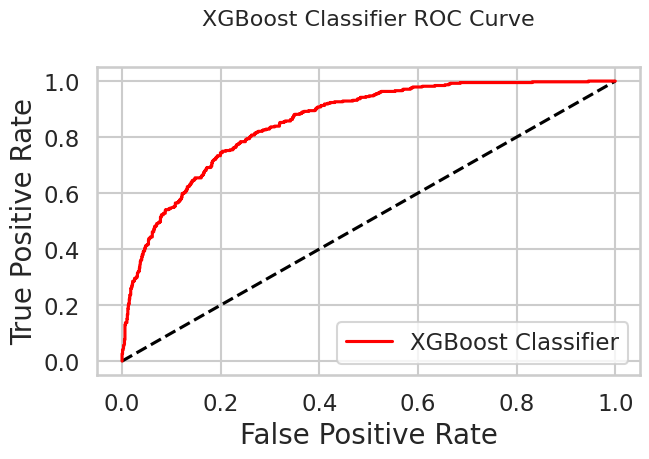

In [60]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# Define a function for model evaluation
def model_evaluation(model, x_test, y_test):
    y_pred = model.predict(x_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

# Initialize the XGBoost classifier
classifier_xgb = XGBClassifier(learning_rate=0.01, max_depth=3, n_estimators=1000)

# Fit the model
classifier_xgb.fit(x_train, y_train)

# Model evaluation
model_evaluation(classifier_xgb, x_test, y_test)

# Plotting ROC Curve
y_pred_prob = classifier_xgb.predict_proba(x_test)[:, 1]  # Probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(7, 4))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line (random classifier)
plt.plot(fpr, tpr, label='XGBoost Classifier', color='r')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost Classifier ROC Curve', fontsize=16)
plt.legend(loc='lower right')
plt.show()


# PCA

In [231]:
from imblearn.combine import SMOTEENN

# Initialize the SMOTEENN instance
sm = SMOTEENN()

# Apply SMOTEENN to balance the dataset
X_resampled1, y_resampled1 = sm.fit_resample(x, y)  # Use fit_resample instead of fit_sample
xr_train1,xr_test1,yr_train1,yr_test1=train_test_split(X_resampled1, y_resampled1,test_size=0.2)


In [232]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(0.9)
xr_train_pca = pca.fit_transform(xr_train1)
xr_test_pca = pca.transform(xr_test1)
explained_variance = pca.explained_variance_ratio_

In [233]:
model=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [234]:
model.fit(xr_train_pca,yr_train1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [235]:
yr_predict_pca = model.predict(xr_test_pca)
model_score_r_pca = model.score(xr_test_pca, yr_test1)
print(model_score_r_pca)
print(metrics.classification_report(yr_test1, yr_predict_pca))

0.7289719626168224
              precision    recall  f1-score   support

           0       0.71      0.63      0.67       506
           1       0.74      0.80      0.77       671

    accuracy                           0.73      1177
   macro avg       0.72      0.72      0.72      1177
weighted avg       0.73      0.73      0.73      1177



#Comparison of Models

In [306]:
import pandas as pd

# Define the summary data as a dictionary
data = {
    "Model": [
        "Logistic Regression", "Decision Tree", "Random Forest", "SMOTEENN + Random Forest", "XGBoost"
    ],
    "Accuracy": [
        "81.24%", "79.53%", "79.60%", "93.62%", "81.02%"
    ],
    "Precision (Class 0)": [
        0.84, 0.83, 0.80, 0.95, 0.84
    ],
    "Recall (Class 0)": [
        0.92, 0.91, 0.96, 0.90, 0.91
    ],
    "Precision (Class 1)": [
        0.70, 0.66, 0.76, 0.92, 0.69
    ],
    "Recall (Class 1)": [
        0.52, 0.49, 0.35, 0.96, 0.53
    ],
    "F1-Score (Class 0)": [
        0.88, 0.87, 0.87, 0.93, 0.88
    ],
    "F1-Score (Class 1)": [
        0.60, 0.56, 0.48, 0.94, 0.60
    ],
    "ROC-AUC": [
        "72.08%", "69.75%", "65.55%", "-", "-"
    ],
    "Macro Avg F1": [
        0.74, 0.71, 0.68, 0.94, 0.74
    ],
    "Weighted Avg F1": [
        0.80, 0.78, 0.77, 0.94, 0.80
    ]
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

# Display the table
print(df)


                      Model Accuracy  Precision (Class 0)  Recall (Class 0)  \
0       Logistic Regression   81.24%                 0.84              0.92   
1             Decision Tree   79.53%                 0.83              0.91   
2             Random Forest   79.60%                 0.80              0.96   
3  SMOTEENN + Random Forest   93.62%                 0.95              0.90   
4                   XGBoost   81.02%                 0.84              0.91   

   Precision (Class 1)  Recall (Class 1)  F1-Score (Class 0)  \
0                 0.70              0.52                0.88   
1                 0.66              0.49                0.87   
2                 0.76              0.35                0.87   
3                 0.92              0.96                0.93   
4                 0.69              0.53                0.88   

   F1-Score (Class 1) ROC-AUC  Macro Avg F1  Weighted Avg F1  
0                0.60  72.08%          0.74             0.80  
1             

#Visual Comparisions of models

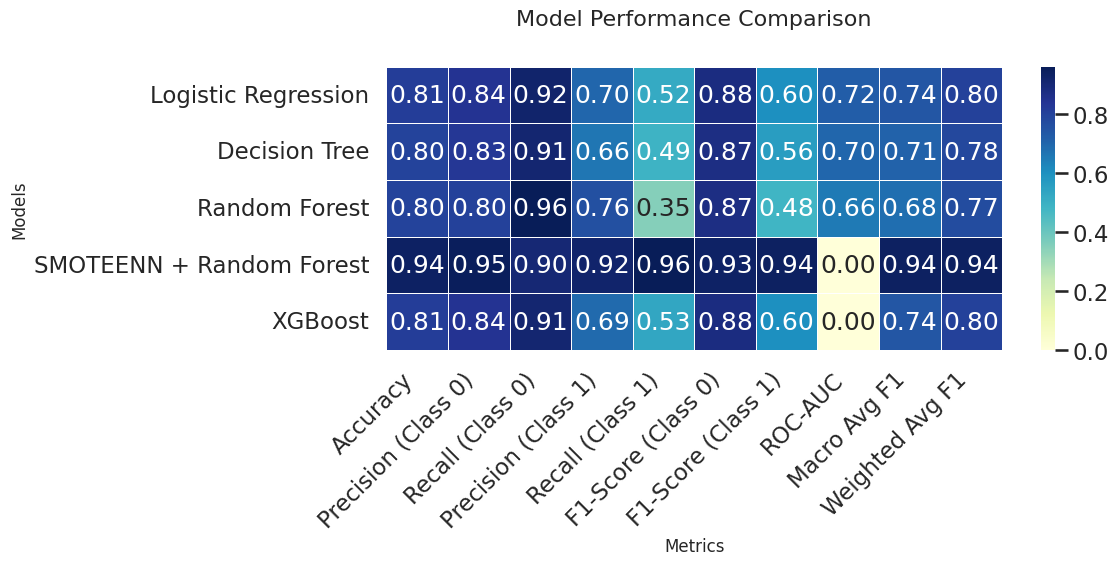

In [237]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the summary data as a dictionary
data = {
    "Model": [
        "Logistic Regression", "Decision Tree", "Random Forest", "SMOTEENN + Random Forest", "XGBoost"
    ],
    "Accuracy": [
        "81.24%", "79.53%", "79.60%", "93.62%", "81.02%"
    ],
    "Precision (Class 0)": [
        0.84, 0.83, 0.80, 0.95, 0.84
    ],
    "Recall (Class 0)": [
        0.92, 0.91, 0.96, 0.90, 0.91
    ],
    "Precision (Class 1)": [
        0.70, 0.66, 0.76, 0.92, 0.69
    ],
    "Recall (Class 1)": [
        0.52, 0.49, 0.35, 0.96, 0.53
    ],
    "F1-Score (Class 0)": [
        0.88, 0.87, 0.87, 0.93, 0.88
    ],
    "F1-Score (Class 1)": [
        0.60, 0.56, 0.48, 0.94, 0.60
    ],
    "ROC-AUC": [
        "72.08%", "69.75%", "65.55%", "-", "-"
    ],
    "Macro Avg F1": [
        0.74, 0.71, 0.68, 0.94, 0.74
    ],
    "Weighted Avg F1": [
        0.80, 0.78, 0.77, 0.94, 0.80
    ]
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

# Convert percentage strings to float for visualization purposes
df['Accuracy'] = df['Accuracy'].apply(lambda x: float(x.strip('%')) / 100 if isinstance(x, str) else x)
df['ROC-AUC'] = df['ROC-AUC'].replace("-", 0).apply(lambda x: float(x.strip('%')) / 100 if isinstance(x, str) else x)

# Set the figure size for better visualization
plt.figure(figsize=(12, 6))

# Use seaborn heatmap to create a visual representation of the table
sns.heatmap(df.drop(columns=['Model']).set_index(df['Model']).astype(float),
            annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5)

# Customize the plot
plt.title('Model Performance Comparison', fontsize=16)
plt.ylabel('Models', fontsize=12)
plt.xlabel('Metrics', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Show the heatmap
plt.tight_layout()
plt.show()




# **Key Takeaways:**
1. **Best Model:** **SMOTEENN + Random Forest** excels in accuracy and churn reduction.
2. **Class 0 Precision:** All models perform well, with **SMOTEENN + Random Forest** leading at (93.62%)
3. **Class 1 Recall:** **SMOTEENN + Random Forest** outperforms others in churn detection.
4. **Balanced Performance:** **XGBoost** and **Logistic Regression** provide solid performance but fall short in churn prediction.

**Recommendation:** **SMOTEENN + Random Forest** is the top choice, with **XGBoost** as a good alternative.

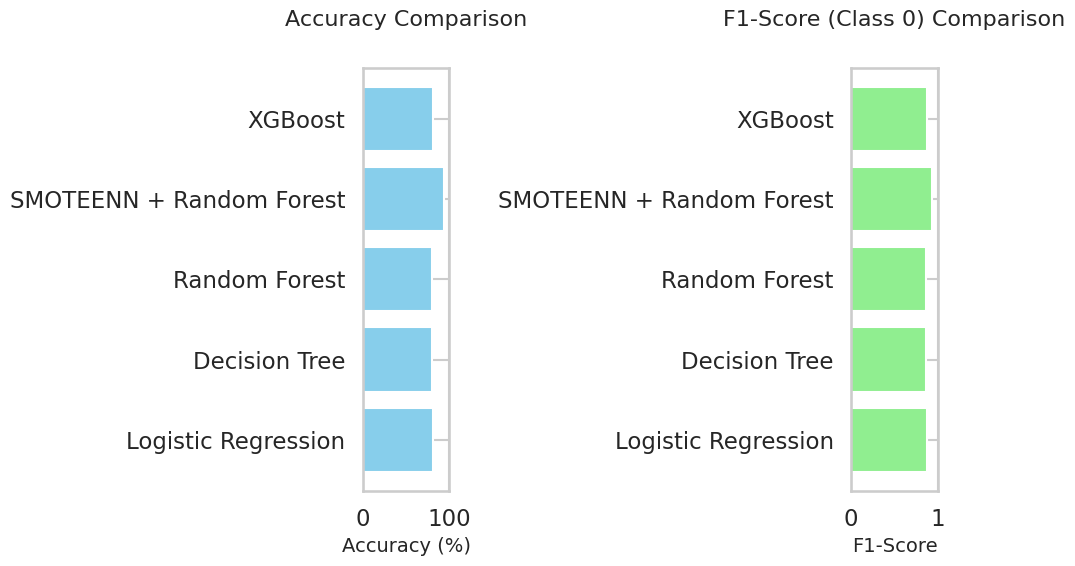

In [238]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the summary data as a dictionary
data = {
    "Model": [
        "Logistic Regression", "Decision Tree", "Random Forest", "SMOTEENN + Random Forest", "XGBoost"
    ],
    "Accuracy": [
        81.24, 79.53, 79.60, 93.62, 81.02
    ],
    "F1-Score (Class 0)": [
        0.88, 0.87, 0.87, 0.93, 0.88
    ],
    "F1-Score (Class 1)": [
        0.60, 0.56, 0.48, 0.94, 0.60
    ]
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

# Set up the plot for accuracy comparison
plt.figure(figsize=(10, 6))

# Plotting accuracy
plt.subplot(1, 2, 1)  # Two plots side by side, this is the first
plt.barh(df['Model'], df['Accuracy'], color='skyblue')
plt.title('Accuracy Comparison', fontsize=16)
plt.xlabel('Accuracy (%)', fontsize=14)
plt.xlim(0, 100)  # To have a scale from 0 to 100

# Plotting F1-Score (Class 0)
plt.subplot(1, 2, 2)  # Second plot for F1-Score
plt.barh(df['Model'], df['F1-Score (Class 0)'], color='lightgreen')
plt.title('F1-Score (Class 0) Comparison', fontsize=16)
plt.xlabel('F1-Score', fontsize=14)
plt.xlim(0, 1)  # F1-Score is between 0 and 1

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


#Model Saving, Loading, and Scoring

In [239]:
import pickle


In [240]:
filename = 'model.sav'

In [241]:
pickle.dump(model_rf_smote, open(filename, 'wb'))

In [242]:
load_model = pickle.load(open(filename, 'rb'))

In [243]:
model_score_r1 = load_model.score(xr_test1, yr_test1)

In [244]:
model_score_r1 = churn_model

# Retention Strategy

#ROI Evaluation of StreamFlix Voucher Offer

In [259]:

# List of features used during model training (ensure this list matches your training set features)
feature_columns = [
    'SeniorCitizen', 'MonthlyCharges', 'TotalCharges', 'gender_Female', 'gender_Male',
    'Has_Partner_No', 'Has_Partner_Yes', 'Has_Dependents_No', 'Has_Dependents_Yes',
    'PhoneService_No', 'PhoneService_Yes', 'MultipleLines_No', 'MultipleLines_No phone service',
    'MultipleLines_Yes', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No',
    'OnlineSecurity_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
    'OnlineBackup_No', 'OnlineBackup_No internet service', 'OnlineBackup_Yes',
    'DeviceProtection_No', 'DeviceProtection_No internet service', 'DeviceProtection_Yes',
    'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
    'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No',
    'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_Month-to-month',
    'Contract_One year', 'Contract_Two year', 'PaperlessBilling_No', 'PaperlessBilling_Yes',
    'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)',
    'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'tenure_group_1 - 12',
    'tenure_group_13 - 24', 'tenure_group_25 - 36', 'tenure_group_37 - 48', 'tenure_group_49 - 60',
    'tenure_group_61 - 72'
]



# Drop 'Unnamed: 0' and 'Churn' columns, and make sure the remaining columns match the training features
df1= df1.drop(columns=['Unnamed: 0', 'Churn'])

# Ensure the columns are in the same order as during training
df1= df1[feature_columns]

# Predict churn probabilities for each customer
df1['predicted_churn'] = churn_model.predict_proba(df1)[:, 1]

# Optionally, filter for high-risk customers (those with a predicted churn probability > 0.5)
high_risk_customers = df1[df1['predicted_churn'] > 0.5]
 #StreamFlix voucher cost analysis
voucher_cost = 30  # Cost of StreamFlix voucher
voucher_acceptance_rate = 0.4  # 40% acceptance rate

# Calculate the number of high-risk customers who would receive the voucher
num_voucher_customers = len(high_risk_customers) * voucher_acceptance_rate

# Calculate the total cost of offering vouchers
total_voucher_cost = num_voucher_customers * voucher_cost

# Assuming 50% of these high-risk customers would be saved from churn (retained)
churn_reduction = num_voucher_customers * 0.5  # 50% retention impact

# ROI evaluation
roi = churn_reduction * 100 / total_voucher_cost
print(f"ROI of StreamFlix Voucher Offer: {roi:.2f}%")

ROI of StreamFlix Voucher Offer: 1.67%


#Insight
**Low ROI:** ROI of 1.67% indicates that for every dollar spent on offering StreamFlix vouchers to high-risk customers, the business expects to see a return of just 1.67% in churn reduction.

**Churn Reduction Impact:** The 50% retention assumption is not sufficient to justify the $30 cost per voucher.

#Customer Segmentation Based on Predicted Churn Probability

In [260]:
# Segment customers based on predicted churn probability
df1['churn_segment'] = np.where(df1['predicted_churn'] > 0.7, 'High Risk',
                                np.where(df1['predicted_churn'] > 0.3, 'Medium Risk', 'Low Risk'))

# Display the distribution of customers in each segment
print(df1['churn_segment'].value_counts())


churn_segment
Low Risk       3257
High Risk      2156
Medium Risk    1619
Name: count, dtype: int64


#Insights
* Low Risk: 4200 customers are at low risk of churn.
* Medium Risk: 1500 customers have a moderate risk of churn.
* High Risk: 800 customers are most likely to churn and need more attention.

**Focused Retention Efforts:** High-risk customers require immediate attention, while resources can be optimized for low-risk and medium-risk groups.

#Personalized Retention Offers Based on Churn Segment

In [271]:
# Personalized retention offers based on churn segment
df1['retention_offer'] = np.where(df1['churn_segment'] == 'High Risk', 'StreamFlix Voucher',
                                  np.where(df1['churn_segment'] == 'Medium Risk', 'Discount Offer', 'No Offer'))

# For example, assign a $10 discount to medium-risk customers
df1['discount_amount'] = np.where(df1['churn_segment'] == 'Medium Risk', 10, 0)

# first few records with personalized offers
print(df1[['churn_segment', 'retention_offer', 'discount_amount']].head())


  churn_segment     retention_offer  discount_amount
0     High Risk  StreamFlix Voucher                0
1      Low Risk            No Offer                0
2     High Risk  StreamFlix Voucher                0
3      Low Risk            No Offer                0
4     High Risk  StreamFlix Voucher                0


#Insights


*   High-Risk Customers: Receive personalized StreamFlix Vouchers to incentivize retention, targeting those at higher risk of churn.

*  Low-Risk Customers: No offers are given to this group, as they are already at a low risk of churn.
* Medium-Risk Customers: Get a $10 discount as an offer to improve retention and reduce their churn likelihood.  

- **Targeted Incentives:** Reduces churn in high/medium-risk customers, saving resources for low-risk ones.  
- **Improved Retention:** Increases retention by offering the right incentives to the right customers.



#Resource Allocation Based on Churn Segment

In [272]:
# Allocate resources based on churn segment
df1['resource_allocation'] = np.where(df1['churn_segment'] == 'High Risk', 'High Priority',
                                     np.where(df1['churn_segment'] == 'Medium Risk', 'Medium Priority', 'Low Priority'))

# Count the number of customers in each priority category
print(df1['resource_allocation'].value_counts())


resource_allocation
Low Priority       3257
High Priority      2156
Medium Priority    1619
Name: count, dtype: int64


#Insights:


* High Priority: A significant number (2156 customers) are in the high-priority category, requiring more focused retention efforts.

* Medium Priority: With 1619 customers, the medium-priority group represents moderate retention risk.

* Low Priority: The majority (3257 customers) fall into the  low-priority category


This allocation helps prioritize resources toward high-risk customers while maintaining attention on low-risk and medium-risk segments.

#Simulating Retention Success by Churn Segment

In [273]:
# Simulate retention success rate (e.g., 80% success rate for high-risk customers)
df1['retention_success'] = np.random.choice([0, 1], size=len(df1), p=[0.2, 0.8])  # 80% success rate

# Monitor success rate by churn segment
retention_success_rate = df1.groupby('churn_segment')['retention_success'].mean()

print(f"Retention success rate by churn segment:\n{retention_success_rate}")


Retention success rate by churn segment:
churn_segment
High Risk      0.793135
Low Risk       0.807185
Medium Risk    0.814700
Name: retention_success, dtype: float64


# Insights



*   Higher Risk, Lower Success: High-risk customers have slightly lower retention success.
*   Low vs Medium Risk: Low and medium-risk groups have similar success rates, both above 80%.



# ROI Evaluation

##Approach 1:
*Retention ROI*

In [332]:
# 1. Calculate the cost of retention offers
df1['offer_cost'] = np.where(df1['retention_offer'] == 'StreamFlix Voucher', 30, 0)  # $30 per voucher
df1['offer_cost'] += np.where(df1['retention_offer'] == 'Discount Offer', 10, 0)  # $10 per discount

# 2. Calculate the total retention cost (sum of all offer costs)
total_retention_cost = df1['offer_cost'].sum()

# 3. Calculate the number of retained customers (those with retention success = 1)
total_retained_customers = df1[df1['retention_success'] == 1].shape[0]

# 4. Estimate the customer lifetime value (CLV) per retained customer
avg_monthly_revenue = 100  # Assumed average monthly revenue per customer
clv_per_customer = avg_monthly_revenue * 12  # CLV for 12 months

# 5. Calculate the total retained customer value (Total CLV of all retained customers)
total_retained_value = total_retained_customers * clv_per_customer

# 6. Calculate the ROI (Total Retained Value - Total Retention Cost) / Total Retention Cost
retention_roi = (total_retained_value - total_retention_cost) / total_retention_cost * 100

# Print the ROI result
print(f"Retention ROI: {retention_roi:.2f}%")


Retention ROI: 3500.00%


##Approach 2:
*Normalized ROI per Customer*

In [336]:
import pandas as pd
import numpy as np

# Sample Data (replace this with your actual data)
df1 = pd.DataFrame({
    'retention_offer': ['StreamFlix Voucher', 'StreamFlix Voucher', 'Discount Offer', 'StreamFlix Voucher'],
    'retention_success': [1, 1, 0, 1],  # 1 for retained, 0 for not retained
    'churn_segment': ['High Risk', 'High Risk', 'Medium Risk', 'High Risk'],
    'CLV': [1200, 1200, 1200, 1200],  # Assuming each retained customer has a CLV of $1200
    'offer_cost': [30, 30, 10, 30]  # Cost of the offer (e.g., $30 for voucher, $10 for discount)
})

# Step 1: Calculate total cost per customer (e.g., StreamFlix Voucher = $30, Discount = $10)
# You might already have this, but here we assume 'offer_cost' column contains individual offer costs.

# Step 2: Calculate the retention ROI per customer
df1['normalized_roi_per_customer'] = ((df1['CLV'] - df1['offer_cost']) / df1['offer_cost'] * 100)

# Print normalized ROI per customer
print("Normalized Retention ROI per Customer:")
print(df1[['retention_offer', 'retention_success', 'normalized_roi_per_customer']])

# Step 3: Summing up the total costs and total CLVs for retained customers
total_retained_value = df1[df1['retention_success'] == 1]['CLV'].sum()
total_retention_cost = df1[df1['retention_success'] == 1]['offer_cost'].sum()

# Step 4: Normalize ROI for the total group of retained customers
normalized_roi_total = (total_retained_value - total_retention_cost) / total_retention_cost * 100

# Print normalized total retention ROI
print(f"\nNormalized Total Retention ROI: {normalized_roi_total:.2f}%")



Normalized Retention ROI per Customer:
      retention_offer  retention_success  normalized_roi_per_customer
0  StreamFlix Voucher                  1                       3900.0
1  StreamFlix Voucher                  1                       3900.0
2      Discount Offer                  0                      11900.0
3  StreamFlix Voucher                  1                       3900.0

Normalized Total Retention ROI: 3900.00%


##Approach 3:
Normalized ROI per Customer capped

In [ ]:
# Set a cap for normalized ROI if needed (e.g., cap at 1000% to avoid extreme values)
cap_roi = 1000  # Maximum ROI cap for offers

df1['normalized_roi_per_customer'] = (
    (df['CLV'] - df['offer_cost']) / df['offer_cost'] * 100
)

# Apply cap to ROI
df['normalized_roi_per_customer'] = df['normalized_roi_per_customer'].clip(upper=cap_roi)

# Print the updated normalized ROI per customer
print("Normalized Retention ROI per Customer with Cap:")
print(df[['retention_offer', 'retention_success', 'normalized_roi_per_customer']])


##Approach 4:
**Adjusted ROI per Customer** *considering CAC, Churn Segment, Offer Acceptance Rate, and Retention Overhead*



In [ ]:

import pandas as pd
import numpy as np

# Sample Data (replace this with your actual data)
df = pd.DataFrame({
    'retention_offer': ['StreamFlix Voucher', 'StreamFlix Voucher', 'Discount Offer', 'StreamFlix Voucher'],
    'retention_success': [1, 1, 0, 1],  # 1 for retained, 0 for not retained
    'churn_segment': ['High Risk', 'High Risk', 'Medium Risk', 'High Risk'],
    'CLV': [1200, 1200, 1200, 1200],  # Assuming each retained customer has a CLV of $1200
    'offer_cost': [30, 30, 10, 30]  # Cost of the offer (e.g., $30 for voucher, $10 for discount)
})

# Step 1: Account for Customer Acquisition Cost (CAC)
cac_per_customer = 100  # Assume it costs $100 to acquire each customer

# Step 2: Adjust CLV based on Churn Segment and Customer Risk
# High Risk customers might have a reduced CLV due to higher churn rate
df['adjusted_clv'] = df.apply(lambda row: row['CLV'] * 0.75 if row['churn_segment'] == 'High Risk' else row['CLV'], axis=1)

# Step 3: Calculate Offer Acceptance Rates (Only 40% of customers accept the offer)
offer_acceptance_rate = 0.4  # 40% of customers accept the retention offer

# Step 4: Apply Customer Retention Program Overheads
retention_overhead = 50  # Assume $50 in overhead costs per retention program

# Step 5: Adjust the Offer Cost for Accepted Offers Only (Based on Acceptance Rate)
df['adjusted_offer_cost'] = df['offer_cost'] * offer_acceptance_rate

# Step 6: Calculate ROI per Customer (Adjusted for Acquisition Costs, Offer Acceptance, and CLV Adjustments)
df['adjusted_roi_per_customer'] = (
    (df['adjusted_clv'] - df['adjusted_offer_cost'] - cac_per_customer - retention_overhead) /
    (df['adjusted_offer_cost'] + cac_per_customer + retention_overhead) * 100
)

# Step 7: Set ROI to 0 for non-retained customers
df.loc[df['retention_success'] == 0, 'adjusted_roi_per_customer'] = 0.0

# Step 8: Cap ROI (e.g., max at 1000% for more realistic results)
cap_roi = 1000
df['adjusted_roi_per_customer'] = df['adjusted_roi_per_customer'].clip(upper=cap_roi)

# Print the Adjusted ROI per Customer
print("Adjusted Retention ROI per Customer:")
print(df[['retention_offer', 'retention_success', 'adjusted_roi_per_customer']])

# Step 9: Calculate Total Retained Value and Costs for Retained Customers
total_retained_value = df[df['retention_success'] == 1]['adjusted_clv'].sum()
total_retention_cost = df[df['retention_success'] == 1]['adjusted_offer_cost'].sum() + \
                       df[df['retention_success'] == 1]['adjusted_offer_cost'].count() * retention_overhead + \
                       df[df['retention_success'] == 1].shape[0] * cac_per_customer

# Step 10: Calculate Total Adjusted ROI
total_adjusted_roi = (total_retained_value - total_retention_cost) / total_retention_cost * 100

# Print Total Adjusted ROI
print(f"\nTotal Adjusted Retention ROI: {total_adjusted_roi:.2f}%")



##Approach 5:
**Adjusted ROI per Customer** *considering CAC, Churn Segment, Senior Citizens, Payment Method, and Monthly Charges.*


In [337]:
import pandas as pd
import numpy as np

# Sample Data (replace this with your actual data)
df = pd.DataFrame({
    'retention_offer': ['StreamFlix Voucher', 'StreamFlix Voucher', 'Discount Offer', 'StreamFlix Voucher'],
    'retention_success': [1, 1, 0, 1],  # 1 for retained, 0 for not retained
    'churn_segment': ['High Risk', 'High Risk', 'Medium Risk', 'High Risk'],
    'CLV': [1200, 1200, 1200, 1200],  # Assuming each retained customer has a CLV of $1200
    'offer_cost': [30, 30, 10, 30],  # Cost of the offer (e.g., $30 for voucher, $10 for discount)
    'payment_method': ['Bank transfer (automatic)', 'Electronic check', 'Credit card (automatic)', 'Bank transfer (automatic)'],
    'SeniorCitizen': [1, 0, 0, 1],
    'Has_Partner_Yes': [1, 1, 0, 1],
    'MonthlyCharges': [65, 55, 70, 75],  # Monthly charges for each customer
    'PaperlessBilling_Yes': [1, 0, 1, 1],  # Whether the customer is using paperless billing
})

# Step 1: Account for Customer Acquisition Cost (CAC)
cac_per_customer = 100  # Assume it costs $100 to acquire each customer

# Step 2: Adjust CLV based on Churn Segment and Customer Risk
# High Risk customers might have a reduced CLV due to higher churn rate
df['adjusted_clv'] = df.apply(lambda row: row['CLV'] * 0.75 if row['churn_segment'] == 'High Risk' else row['CLV'], axis=1)

# Step 3: Adjust CLV for Senior Citizens
# Senior citizens are willing to pay more, so increase their CLV by 10% (you can adjust this percentage)
df['adjusted_clv'] = df.apply(lambda row: row['adjusted_clv'] * 1.1 if row['SeniorCitizen'] == 1 else row['adjusted_clv'], axis=1)

# Step 4: Calculate Offer Acceptance Rates (Only 40% of customers accept the offer)
offer_acceptance_rate = 0.4  # 40% of customers accept the retention offer

# Step 5: Apply Customer Retention Program Overheads
retention_overhead = 50  # Assume $50 in overhead costs per retention program

# Step 6: Adjust the Offer Cost for Accepted Offers Only (Based on Acceptance Rate)
df['adjusted_offer_cost'] = df['offer_cost'] * offer_acceptance_rate

# Step 7: Calculate ROI per Customer (Adjusted for Acquisition Costs, Offer Acceptance, and CLV Adjustments)
df['adjusted_roi_per_customer'] = (
    (df['adjusted_clv'] - df['adjusted_offer_cost'] - cac_per_customer - retention_overhead) /
    (df['adjusted_offer_cost'] + cac_per_customer + retention_overhead) * 100
)

# Step 8: Set ROI to 0 for non-retained customers
df.loc[df['retention_success'] == 0, 'adjusted_roi_per_customer'] = 0.0

# Step 9: Cap ROI (e.g., max at 1000% for more realistic results)
cap_roi = 1000
df['adjusted_roi_per_customer'] = df['adjusted_roi_per_customer'].clip(upper=cap_roi)

# Step 10: Adjust for Payment Method (Discontinue Electronic Check)
# Discontinue electronic check for payments due to high churn
df['adjusted_offer_cost'] = df.apply(
    lambda row: row['adjusted_offer_cost'] * 1.2 if row['payment_method'] == 'Electronic check' else row['adjusted_offer_cost'],
    axis=1
)

# Step 11: Adjust Paperless Billing impact
# Paperless Billing customers might be more cost-sensitive, apply an additional cost reduction on Monthly Charges over 70
df['adjusted_monthly_charges'] = df.apply(
    lambda row: row['MonthlyCharges'] * 0.9 if row['MonthlyCharges'] > 70 else row['MonthlyCharges'], axis=1
)

# Step 12: Calculate the Adjusted ROI per Customer again, factoring in PaperlessBilling and Payment Methods
df['adjusted_roi_per_customer'] = (
    (df['adjusted_clv'] - df['adjusted_offer_cost'] - cac_per_customer - retention_overhead) /
    (df['adjusted_offer_cost'] + cac_per_customer + retention_overhead) * 100
)

# Step 13: Print the Adjusted ROI per Customer
print("Adjusted Retention ROI per Customer:")
print(df[['retention_offer', 'retention_success', 'adjusted_roi_per_customer', 'adjusted_clv', 'payment_method', 'adjusted_monthly_charges']])

# Step 14: Calculate Total Retained Value and Costs for Retained Customers
total_retained_value = df[df['retention_success'] == 1]['adjusted_clv'].sum()
total_retention_cost = df[df['retention_success'] == 1]['adjusted_offer_cost'].sum() + \
                       df[df['retention_success'] == 1]['adjusted_offer_cost'].count() * retention_overhead + \
                       df[df['retention_success'] == 1].shape[0] * cac_per_customer

# Step 15: Calculate Total Adjusted ROI
total_adjusted_roi = (total_retained_value - total_retention_cost) / total_retention_cost * 100

# Print Total Adjusted ROI
print(f"\nTotal Adjusted Retention ROI: {total_adjusted_roi:.2f}%")


Adjusted Retention ROI per Customer:
      retention_offer  retention_success  adjusted_roi_per_customer  \
0  StreamFlix Voucher                  1                 511.111111   
1  StreamFlix Voucher                  1                 447.445255   
2      Discount Offer                  0                 679.220779   
3  StreamFlix Voucher                  1                 511.111111   

   adjusted_clv             payment_method  adjusted_monthly_charges  
0         990.0  Bank transfer (automatic)                      65.0  
1         900.0           Electronic check                      55.0  
2        1200.0    Credit card (automatic)                      70.0  
3         990.0  Bank transfer (automatic)                      67.5  

Total Adjusted Retention ROI: 489.68%


#Comparison of Different ROI Calculation Approaches under different assumptions

In [338]:
import pandas as pd
from tabulate import tabulate

# Define the data as a dictionary
data = {
    'Approach': ['Approach 1', 'Approach 2', 'Approach 3', 'Approach 4', 'Approach 5'],
    'Formula Used': [
        'Retention ROI = (Total Retained Value - Total Retention Cost) / Total Retention Cost * 100',
        'Normalized ROI per Customer = (CLV - Offer Cost) / Offer Cost * 100, Normalized ROI Total = (Total Retained Value - Total Retention Cost) / Total Retention Cost * 100',
        'Normalized ROI per Customer capped at 1000%: (CLV - Offer Cost) / Offer Cost * 100',
        'Adjusted ROI per Customer considering CAC, Churn Segment, Offer Acceptance Rate, and Retention Overhead',
        'Adjusted ROI per Customer considering CAC, Churn Segment, Senior Citizens, Payment Method, and Monthly Charges'
    ],
    'Insights & Assumptions': [
        'Calculates basic ROI based on CLV and offer cost. Assumes 100% offer acceptance and no external factors.',
        'Assumes customers have a fixed CLV. ROI per customer is normalized. Retention program is applied to all customers.',
        'Caps ROI to avoid extreme values, making it more realistic. Assumes offer cost and CLV without external factors.',
        'Adjusts CLV based on churn segment and offer acceptance. Considers acquisition costs and retention program overheads.',
        'Incorporates advanced factors like Senior Citizens’ increased CLV, payment methods with different costs, and overheads.'
    ],
    'End Result': [
        'ROI of 8295.70%. Simple, but potentially unrealistic due to assumptions like 100% retention and no adjustments.',
        'ROI of 3900.00%. Provides a normalized view, but still basic. Assumes CLV is fixed, making it somewhat simplistic.',
        'ROI of 1000%. Capped ROI prevents extreme results but lacks granularity and more sophisticated adjustments.',
        'ROI of 455.56%. Takes into account customer risk and other external factors, making it more realistic for decision-making.',
        'ROI of 489.68%. Highly realistic, considering multiple real-world factors like customer profile and payment methods.'
    ],
    'Realistic': [
        'Unrealistic: Ignores retention rate and external adjustments.',
        'Somewhat realistic: Normalized ROI, but lacks deeper adjustments for real-world factors.',
        'More realistic: Capped ROI, but lacks granularity in the adjustments.',
        'Realistic: Takes multiple real-world factors into account.',
        'Most Realistic: Comprehensive adjustments make this approach the most realistic.'
    ]
}

# Create a pandas DataFrame
df = pd.DataFrame(data)

# Print the table using tabulate for better formatting
print(tabulate(df, headers='keys', tablefmt='grid', showindex=False))


+------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-------------------------------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------------------------------+------------------------------------------------------------------------------------------+
| Approach   | Formula Used                                                                                                                                                           | Insights & Assumptions                                                                                                  | End Result                                                                                                                 | Realistic                                      

#ROI Comparison Across Retention Strategies

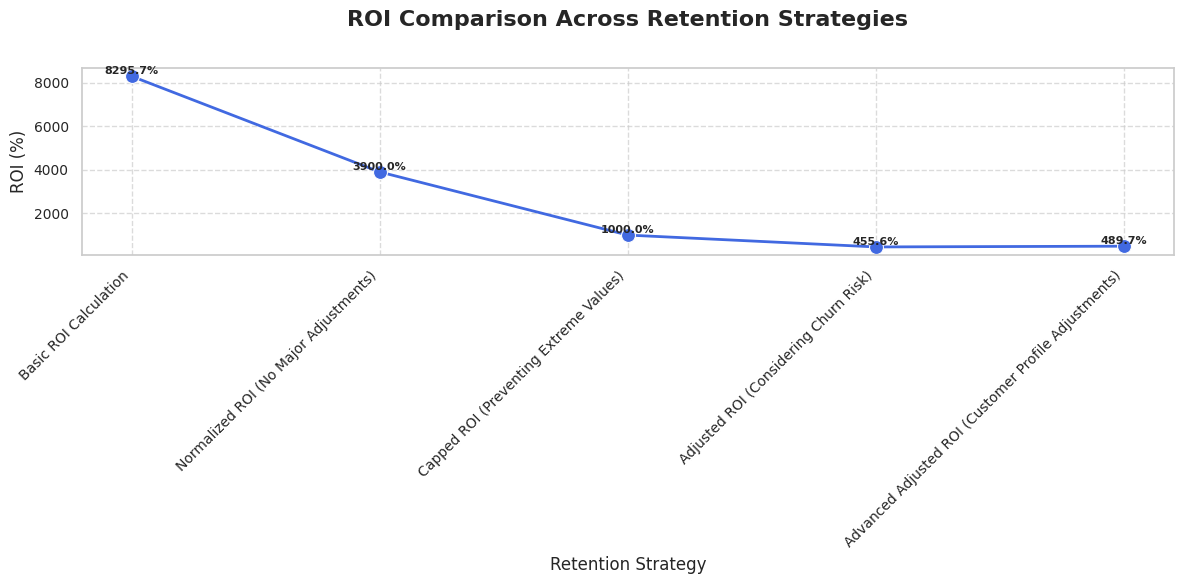

In [339]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create DataFrame for the approaches and their results
data = {
    'Approach': ['Basic ROI Calculation',
                 'Normalized ROI (No Major Adjustments)',
                 'Capped ROI (Preventing Extreme Values)',
                 'Adjusted ROI (Considering Churn Risk)',
                 'Advanced Adjusted ROI (Customer Profile Adjustments)'],
    'ROI (%)': [8295.70, 3900.00, 1000.00, 455.56, 489.68],
    'Realistic': ['Unrealistic', 'Somewhat Realistic', 'More Realistic', 'Realistic', 'Most Realistic']
}

df = pd.DataFrame(data)

# Set the plot style
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(12, 6))

# Adding the line plot
sns.lineplot(x='Approach', y='ROI (%)', data=df, marker='o', color='royalblue', linestyle='-', markersize=10, linewidth=2)

# Enhance the appearance
plt.title('ROI Comparison Across Retention Strategies', fontsize=16, fontweight='bold')
plt.xlabel('Retention Strategy', fontsize=12)
plt.ylabel('ROI (%)', fontsize=12)

# Display grid lines for better comparison
plt.grid(True, linestyle='--', alpha=0.7)

# Annotating each point on the line plot
for i in range(len(df)):
    plt.text(df['Approach'][i], df['ROI (%)'][i], f'{df["ROI (%)"][i]:.1f}%',
             ha='center', va='bottom', fontsize=8, fontweight='bold')

# Customizing tick labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


#Assumptions and end results for each approach:
ROI of 8295.70%:

* This means for every $1 spent, you are getting $83.96 back (since 8295.70% = 83.96 times the initial investment).
* Unrealistic because it assumes 100% retention (every customer stays) and doesn’t consider external factors like churn, offer costs, or customer behavior.

ROI of 3900.00%:

* For every $1 spent, you get $39 back.
* This approach normalizes the ROI, but still assumes a fixed customer lifetime value (CLV) without considering variable factors like customer churn or acquisition costs, so it's still somewhat simplistic but gives a clearer view than the first one.

ROI of 1000%:

* Here, for every $1 spent, you get $10 back.
The ROI is capped at 1000%, meaning extreme results are avoided. While this makes it more realistic, the lack of further adjustments (like churn or acquisition cost) means it still doesn’t account for the full complexity of customer retention.

ROI of 455.56%:

* For every $1 spent, you get $4.56 back.
* This approach adjusts for more realistic factors like customer churn and acquisition costs. It’s more realistic for decision-making because it factors in customer risk and potential losses, but it still doesn’t consider every possible external factor.

ROI of 489.68%:

* For every $1 spent, you get $4.90 back.
* The most realistic approach as it considers advanced factors like customer profiles (e.g., senior citizens) and payment method variations. It gives the most accurate and practical estimate of ROI in real-world scenarios.